<a href="https://colab.research.google.com/github/emerson-matos/tcc-notebooks/blob/main/sentimentos/analise_with_vicuna_with_openchat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
!nvidia-smi

Fri Jan 19 00:36:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.29.06              Driver Version: 545.29.06    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4070 Ti     Off | 00000000:08:00.0  On |                  N/A |
|  0%   40C    P5              24W / 285W |    998MiB / 12282MiB |     37%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
date = '2023-09-01'
filename = 'analisar.csv'
original = pd.read_csv(f"/content/gdrive/MyDrive/tcc/exploratoria/{date}-{filename}")

original.sample(5)

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar
48174,2023-07-07 01:01:02.270986,5.0,4 anos atrás,0,False,Ótima!,salinas-maragogi-all-inclusive-resort,23,2019-07-08,7,2019,2019-07,True,True,False,True,True
16760,2023-07-07 00:39:29.095536,5.0,3 semanas atrás,0,False,Maravilhoso!,hotel-vila-galé---touros,4,2023-06-16,6,2023,2023-06,True,True,False,True,True
44680,2023-07-07 01:13:57.256694,5.0,5 anos atrás,0,False,"Excelente, amei as comidas, pessoal muito gent...",iberostar-bahia,Um,2018-07-08,7,2018,2018-07,True,True,False,True,True
3855,2023-07-07 00:53:08.562847,5.0,3 semanas atrás,0,False,Muito bom hotel,salinas-maceió-all-inclusive-resort,Um,2023-06-16,6,2023,2023-06,True,True,False,True,True
42482,2023-07-07 01:00:29.027940,5.0,4 anos atrás,0,True,Primeiro nível. Funcionários muito atenciosos,iberostar-bahia,61,2019-07-08,7,2019,2019-07,True,True,False,True,True


In [3]:
# treinado = pd.read_csv(f"/content/gdrive/MyDrive/tcc/testando-classificacao.csv")

# treinado.sample(5)

In [4]:
bert = pd.read_csv(f"/content/gdrive/MyDrive/tcc/bert/analise_sentimento_v2.csv", index_col = 0)

bert.sample(5)

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,...,depois_2017,analisar,sentiment_bert_1,sentiment_bert_2,sentiment_bert_3,sentiment_bert_4,sentiment_bert_5,sentiment_bert,sentiment_label,sentiment_score
27055,2023-07-07 00:40:59.861571,5.0,10 meses atrás,0,False,"Amei tudo, principalmente tia Cigarra e recrea...",cana-brava-all-inclusive-resort,Um,2022-09-10,9,...,True,True,"{'label': 'positive', 'score': 0.8665976524353...","{'label': 'positive', 'score': 0.7322225570678...","{'label': 'Positive', 'score': 0.9913252592086...","{'label': 'positive', 'score': 0.9167263507843...","{'label': 'Muito Positivo', 'score': 0.8612735...","[{'label': 'Positive', 'score': 0.991325259208...","['positive', 'muito positivo']","{0.9913252592086792, 0.9167263507843018, 0.732..."
29032,2023-07-07 00:46:39.195898,5.0,um ano atrás,3,True,"Depois de mais de um ano em quarentena, sem co...",cana-brava-all-inclusive-resort,22,2022-07-07,7,...,True,True,"{'label': 'positive', 'score': 0.9508910775184...","{'label': 'positive', 'score': 0.879581093788147}","{'label': 'Negative', 'score': 0.9106577038764...","{'label': 'neutral', 'score': 0.37412047386169...","{'label': 'Muito Positivo', 'score': 0.9498546...","[{'label': 'positive', 'score': 0.950891077518...","['positive', 'muito positivo', 'negative', 'ne...","{0.9508910775184631, 0.9498546123504639, 0.374..."
33940,2023-07-07 00:38:46.764328,5.0,um ano atrás,0,False,Tudo perfeito! Resort maravilhoso. O melhor qu...,hotel-vila-galé-marés,3,2022-07-07,7,...,True,True,"{'label': 'positive', 'score': 0.9954255223274...","{'label': 'positive', 'score': 0.970221757888794}","{'label': 'Positive', 'score': 0.9924599528312...","{'label': 'positive', 'score': 0.9335988759994...","{'label': 'Muito Positivo', 'score': 0.9605919...","[{'label': 'positive', 'score': 0.995425522327...","['positive', 'muito positivo']","{0.9954255223274231, 0.9924599528312683, 0.933..."
43637,2023-07-07 01:07:14.982978,4.0,4 anos atrás,0,True,"Muito bom, só é meio confuso os apartamentos.",iberostar-bahia,19,2019-07-08,7,...,True,True,"{'label': 'negative', 'score': 0.8255198001861...","{'label': 'negative', 'score': 0.6681349277496...","{'label': 'Positive', 'score': 0.9285982847213...","{'label': 'negative', 'score': 0.5537726283073...","{'label': 'Positivo', 'score': 0.8338363766670...","[{'label': 'Positive', 'score': 0.928598284721...","['positive', 'positivo', 'negative']","{0.9285982847213745, 0.8338363766670227, 0.553..."
10371,2023-07-07 00:50:00.295389,5.0,3 anos atrás,0,True,Muito agradável e bom atendimento!!!,nauticomar-resort-all-inclusive-_-beach-club,28,2020-07-07,7,...,True,True,"{'label': 'positive', 'score': 0.9787108302116...","{'label': 'positive', 'score': 0.4863210916519...","{'label': 'Positive', 'score': 0.9920108914375...","{'label': 'positive', 'score': 0.9072284698486...","{'label': 'Muito Positivo', 'score': 0.6387381...","[{'label': 'Positive', 'score': 0.992010891437...","['positive', 'muito positivo']","{0.9920108914375305, 0.9787108302116394, 0.486..."


In [5]:
gpt = pd.read_csv(f"/content/gdrive/MyDrive/tcc/bert/analise_sentimento_gpt.csv", index_col = 0)
gpt = gpt.rename(columns={"tokens": "tokens_gpt"})
gpt = gpt.reset_index(drop=True)
gpt.sample(5)

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar,sentimento_gpt,resultado_gpt,tokens_gpt
1222,2023-07-07 00:37:09.943433,5.0,4 anos atrás,0,True,Excelente hospedagem muito bom mesmo,hotel-marsol-beach-resort,34,2019-07-08,7,2019,2019-07,True,True,False,True,True,positive,2,101
24312,2023-07-07 00:35:09.431385,5.0,2 meses atrás,0,False,Ótima opção para família com crianças. Boa lo...,cana-brava-all-inclusive-resort,2,2023-05-08,5,2023,2023-05,True,True,False,True,True,positive,2,137
36113,2023-07-07 00:47:21.369237,5.0,4 anos atrás,0,True,Muito bom!,hotel-vila-galé-marés,146,2019-07-08,7,2019,2019-07,True,True,False,True,True,positive,2,96
42584,2023-07-07 01:01:03.091860,5.0,4 anos atrás,0,True,"Experiência inesquecível, colaboradores prest...",iberostar-bahia,104,2019-07-08,7,2019,2019-07,True,True,False,True,True,positive,2,139
33601,2023-07-07 00:37:55.969114,5.0,um ano atrás,0,False,Excelente. Recomendo,hotel-vila-galé-marés,5,2022-07-07,7,2022,2022-07,True,True,False,True,True,positive,2,100


In [6]:
openchat = pd.read_csv(f"/content/gdrive/MyDrive/tcc/bert/analise_sentimento_openchat.csv", index_col = 0)
openchat = openchat.rename(columns={"tokens": "tokens_openchat"})
openchat = openchat.reset_index(drop=True)
openchat.sample(5)

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar,sentimento_openchat,resultado_openchat,tokens_openchat
35797,2023-07-07 00:45:54.210667,5.0,4 anos atrás,0,False,"Excelente lugar! A piscina é maravilhosa , e o...",hotel-vila-galé-marés,2,2019-07-08,7,2019,2019-07,True,True,False,True,True,positive,2,142
9643,2023-07-07 00:48:05.621264,5.0,um ano atrás,1,False,Lugar maravilhoso espetacular...vou voltar com...,nauticomar-resort-all-inclusive-_-beach-club,4,2022-07-07,7,2022,2022-07,True,True,False,True,True,positive,2,133
17425,2023-07-07 00:41:29.277463,5.0,um ano atrás,0,False,Eu simplesmente amei sem palavras pra agradece...,hotel-vila-galé---touros,19,2022-07-07,7,2022,2022-07,True,True,False,True,True,positive,2,161
12124,2023-07-07 00:44:55.113864,5.0,2 anos atrás,0,True,"O lugar é um sonho.. maravilha em beleza, ate...",la-torre-resort-all-inclusive,17,2021-07-07,7,2021,2021-07,True,True,False,True,True,positive,2,164
32587,2023-07-07 00:35:25.367486,5.0,3 meses atrás,0,False,Maravilhoso aténdemento top a Taiane do inevit...,hotel-vila-galé-marés,2,2023-04-08,4,2023,2023-04,True,True,False,True,True,positive,2,159


In [7]:
vicuna = pd.read_csv(f"/content/gdrive/MyDrive/tcc/bert/analise_sentimento_vicuna.csv", index_col = 0)
vicuna = vicuna.rename(columns={"sentimento_gpt": "sentimento_vicuna", "resultado_gpt":  "resultado_vicuna", "tokens": "tokens_vicuna"})
vicuna = vicuna.reset_index(drop=True)
vicuna.sample(5)

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar,sentimento_vicuna,resultado_vicuna,tokens_vicuna
11524,2023-07-07 00:43:22.040940,5.0,7 meses atrás,0,True,Perfeito Hotel!!,la-torre-resort-all-inclusive,34,2022-12-09,12,2022,2022-12,True,True,False,True,True,positive,2,141
24445,2023-07-07 00:35:28.156444,5.0,2 meses atrás,0,False,A páscoa maravilhosa tudo organizado os tios d...,cana-brava-all-inclusive-resort,Um,2023-05-08,5,2023,2023-05,True,True,False,True,True,positive,2,160
39810,2023-07-07 00:47:31.111720,5.0,um ano atrás,0,False,Otimos Waffles feitos pelo Paulo Segio!,iberostar-bahia,Um,2022-07-07,7,2022,2022-07,True,True,False,True,True,positive,2,149
15145,2023-07-07 00:35:30.119625,5.0,3 semanas atrás,0,False,excelente lugar pra ir com a familia. adorei,hotel-vila-galé---touros,8,2023-06-16,6,2023,2023-06,True,True,False,True,True,positive,2,148
15323,2023-07-07 00:35:54.565690,5.0,3 semanas atrás,0,False,Amo hotéis com linda vista e esse tá de parabé...,hotel-vila-galé---touros,11,2023-06-16,6,2023,2023-06,True,True,False,True,True,positive,2,170


In [8]:
original.shape

(49219, 17)

In [9]:
bert.shape

(49219, 25)

In [10]:
gpt.shape

(49219, 20)

In [11]:
openchat.shape

(49219, 20)

In [12]:
vicuna.shape

(49219, 20)

In [13]:
values = original['text'].value_counts()
values[values < 5]

Ótimo lugar recomendo                                                                                                                                4
Está sendo ótima                                                                                                                                     4
Comida maravilhosa                                                                                                                                   4
Hotel excelente                                                                                                                                      4
Lindo.                                                                                                                                               4
                                                                                                                                                    ..
Melhor experiência que já vivi. Quartos: Não quero ir mais embora. Segurança: Sem me preocupar

In [14]:
texto_mascara = 'Ótimo lugar recomendo'

In [15]:
ocopy = original[original['text'] == texto_mascara].copy()

In [16]:
gcopy = gpt[gpt['text'] == texto_mascara].copy()

In [17]:
bcopy = bert[bert['text'] == texto_mascara].copy()

In [18]:
opccopy = openchat[openchat['text'] == texto_mascara].copy()

In [19]:
vcopy = vicuna[vicuna['text'] == texto_mascara].copy()

In [20]:
ocopy

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar
7481,2023-07-07 00:37:02.963080,5.0,3 anos atrás,0,False,Ótimo lugar recomendo,hotel-vila-galé_-eco-resort---cabo,11,2020-07-07,7,2020,2020-07,True,True,False,True,True
10469,2023-07-07 00:50:23.242643,5.0,3 anos atrás,0,True,Ótimo lugar recomendo,nauticomar-resort-all-inclusive-_-beach-club,32,2020-07-07,7,2020,2020-07,True,True,False,True,True
31001,2023-07-07 00:55:47.938469,5.0,4 anos atrás,1,True,Ótimo lugar recomendo,cana-brava-all-inclusive-resort,71,2019-07-08,7,2019,2019-07,True,True,False,True,True
32911,2023-07-07 00:36:14.448215,5.0,7 meses atrás,0,True,Ótimo lugar recomendo,hotel-vila-galé-marés,8,2022-12-09,12,2022,2022-12,True,True,False,True,True


In [21]:
gcopy

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar,sentimento_gpt,resultado_gpt,tokens_gpt
7481,2023-07-07 00:37:02.963080,5.0,3 anos atrás,0,False,Ótimo lugar recomendo,hotel-vila-galé_-eco-resort---cabo,11,2020-07-07,7,2020,2020-07,True,True,False,True,True,positive,2,99
10469,2023-07-07 00:50:23.242643,5.0,3 anos atrás,0,True,Ótimo lugar recomendo,nauticomar-resort-all-inclusive-_-beach-club,32,2020-07-07,7,2020,2020-07,True,True,False,True,True,positive,2,99
31001,2023-07-07 00:55:47.938469,5.0,4 anos atrás,1,True,Ótimo lugar recomendo,cana-brava-all-inclusive-resort,71,2019-07-08,7,2019,2019-07,True,True,False,True,True,positive,2,99
32911,2023-07-07 00:36:14.448215,5.0,7 meses atrás,0,True,Ótimo lugar recomendo,hotel-vila-galé-marés,8,2022-12-09,12,2022,2022-12,True,True,False,True,True,positive,2,99


In [22]:
opccopy

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar,sentimento_openchat,resultado_openchat,tokens_openchat
7481,2023-07-07 00:37:02.963080,5.0,3 anos atrás,0,False,Ótimo lugar recomendo,hotel-vila-galé_-eco-resort---cabo,11,2020-07-07,7,2020,2020-07,True,True,False,True,True,positive,2,120
10469,2023-07-07 00:50:23.242643,5.0,3 anos atrás,0,True,Ótimo lugar recomendo,nauticomar-resort-all-inclusive-_-beach-club,32,2020-07-07,7,2020,2020-07,True,True,False,True,True,positive,2,120
31001,2023-07-07 00:55:47.938469,5.0,4 anos atrás,1,True,Ótimo lugar recomendo,cana-brava-all-inclusive-resort,71,2019-07-08,7,2019,2019-07,True,True,False,True,True,positive,2,120
32911,2023-07-07 00:36:14.448215,5.0,7 meses atrás,0,True,Ótimo lugar recomendo,hotel-vila-galé-marés,8,2022-12-09,12,2022,2022-12,True,True,False,True,True,positive,2,120


In [23]:
bcopy

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,...,depois_2017,analisar,sentiment_bert_1,sentiment_bert_2,sentiment_bert_3,sentiment_bert_4,sentiment_bert_5,sentiment_bert,sentiment_label,sentiment_score
7481,2023-07-07 00:37:02.963080,5.0,3 anos atrás,0,False,Ótimo lugar recomendo,hotel-vila-galé_-eco-resort---cabo,11,2020-07-07,7,...,True,True,"{'label': 'positive', 'score': 0.9562457203865...","{'label': 'positive', 'score': 0.7119402885437...","{'label': 'Positive', 'score': 0.9928576946258...","{'label': 'positive', 'score': 0.9233134388923...","{'label': 'Muito Positivo', 'score': 0.7307951...","[{'label': 'Positive', 'score': 0.992857694625...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711..."
10469,2023-07-07 00:50:23.242643,5.0,3 anos atrás,0,True,Ótimo lugar recomendo,nauticomar-resort-all-inclusive-_-beach-club,32,2020-07-07,7,...,True,True,"{'label': 'positive', 'score': 0.9562457203865...","{'label': 'positive', 'score': 0.7119402885437...","{'label': 'Positive', 'score': 0.9928576946258...","{'label': 'positive', 'score': 0.9233134388923...","{'label': 'Muito Positivo', 'score': 0.7307951...","[{'label': 'Positive', 'score': 0.992857694625...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711..."
31001,2023-07-07 00:55:47.938469,5.0,4 anos atrás,1,True,Ótimo lugar recomendo,cana-brava-all-inclusive-resort,71,2019-07-08,7,...,True,True,"{'label': 'positive', 'score': 0.9562457203865...","{'label': 'positive', 'score': 0.7119402885437...","{'label': 'Positive', 'score': 0.9928576946258...","{'label': 'positive', 'score': 0.9233134388923...","{'label': 'Muito Positivo', 'score': 0.7307951...","[{'label': 'Positive', 'score': 0.992857694625...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711..."
32911,2023-07-07 00:36:14.448215,5.0,7 meses atrás,0,True,Ótimo lugar recomendo,hotel-vila-galé-marés,8,2022-12-09,12,...,True,True,"{'label': 'positive', 'score': 0.9562457203865...","{'label': 'positive', 'score': 0.7119402885437...","{'label': 'Positive', 'score': 0.9928576946258...","{'label': 'positive', 'score': 0.9233134388923...","{'label': 'Muito Positivo', 'score': 0.7307951...","[{'label': 'Positive', 'score': 0.992857694625...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711..."


In [24]:
vcopy

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,ano_avaliacao,mes_ano_avaliacao,com_texto,nao_vazio,traduzido,depois_2017,analisar,sentimento_vicuna,resultado_vicuna,tokens_vicuna
7481,2023-07-07 00:37:02.963080,5.0,3 anos atrás,0,False,Ótimo lugar recomendo,hotel-vila-galé_-eco-resort---cabo,11,2020-07-07,7,2020,2020-07,True,True,False,True,True,positive,2,142
10469,2023-07-07 00:50:23.242643,5.0,3 anos atrás,0,True,Ótimo lugar recomendo,nauticomar-resort-all-inclusive-_-beach-club,32,2020-07-07,7,2020,2020-07,True,True,False,True,True,positive,2,142
31001,2023-07-07 00:55:47.938469,5.0,4 anos atrás,1,True,Ótimo lugar recomendo,cana-brava-all-inclusive-resort,71,2019-07-08,7,2019,2019-07,True,True,False,True,True,positive,2,142
32911,2023-07-07 00:36:14.448215,5.0,7 meses atrás,0,True,Ótimo lugar recomendo,hotel-vila-galé-marés,8,2022-12-09,12,2022,2022-12,True,True,False,True,True,positive,2,142


In [25]:
original.shape

(49219, 17)

In [26]:
megazord_tmp = pd.merge(original, bert, how='left')
megazord_tmp2 = pd.merge(megazord_tmp, gpt, how='left')
megazord_tmp3 = pd.merge(megazord_tmp2, openchat, how='left')
megazord = pd.merge(megazord_tmp3, vicuna, how='left')

In [27]:
megazord = megazord.loc[:, ~megazord.columns.duplicated(keep='first')]

In [28]:
equal_columns = megazord.columns[megazord.nunique() == 1]

megazord = megazord.drop(columns=equal_columns)

# Reset index if needed
megazord = megazord.reset_index(drop=True)
megazord.columns

Index(['retrieval_date', 'rating', 'relative_date', 'likes',
       'user_is_local_guide', 'text', 'source', 'user_reviews',
       'data_avaliacao', 'mes_avaliacao', 'ano_avaliacao', 'mes_ano_avaliacao',
       'sentiment_bert_1', 'sentiment_bert_2', 'sentiment_bert_3',
       'sentiment_bert_4', 'sentiment_bert_5', 'sentiment_bert',
       'sentiment_label', 'sentiment_score', 'sentimento_gpt', 'resultado_gpt',
       'tokens_gpt', 'sentimento_openchat', 'resultado_openchat',
       'tokens_openchat', 'sentimento_vicuna', 'resultado_vicuna',
       'tokens_vicuna'],
      dtype='object')

In [29]:
megazord.shape

(49219, 29)

In [30]:
megazord = megazord.reset_index(drop=True)

In [31]:
megazord[megazord['text'] == texto_mascara]

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,...,sentiment_score,sentimento_gpt,resultado_gpt,tokens_gpt,sentimento_openchat,resultado_openchat,tokens_openchat,sentimento_vicuna,resultado_vicuna,tokens_vicuna
7481,2023-07-07 00:37:02.963080,5.0,3 anos atrás,0,False,Ótimo lugar recomendo,hotel-vila-galé_-eco-resort---cabo,11,2020-07-07,7,...,"{0.9928576946258545, 0.9562457203865051, 0.711...",positive,2,99,positive,2,120,positive,2,142
10469,2023-07-07 00:50:23.242643,5.0,3 anos atrás,0,True,Ótimo lugar recomendo,nauticomar-resort-all-inclusive-_-beach-club,32,2020-07-07,7,...,"{0.9928576946258545, 0.9562457203865051, 0.711...",positive,2,99,positive,2,120,positive,2,142
31001,2023-07-07 00:55:47.938469,5.0,4 anos atrás,1,True,Ótimo lugar recomendo,cana-brava-all-inclusive-resort,71,2019-07-08,7,...,"{0.9928576946258545, 0.9562457203865051, 0.711...",positive,2,99,positive,2,120,positive,2,142
32911,2023-07-07 00:36:14.448215,5.0,7 meses atrás,0,True,Ótimo lugar recomendo,hotel-vila-galé-marés,8,2022-12-09,12,...,"{0.9928576946258545, 0.9562457203865051, 0.711...",positive,2,99,positive,2,120,positive,2,142


In [32]:
megazord[megazord['text'] == 'Lugar fantástico, recomendo super.']

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,...,sentiment_score,sentimento_gpt,resultado_gpt,tokens_gpt,sentimento_openchat,resultado_openchat,tokens_openchat,sentimento_vicuna,resultado_vicuna,tokens_vicuna
0,2023-07-07 00:33:49.096786,5.0,10 horas atrás,0,False,"Lugar fantástico, recomendo super.",hotel-marsol-beach-resort,9,2023-07-06,7,...,"{0.9925462603569031, 0.9849022030830383, 0.936...",positive,2,102,positive,2,124,positive,2,147


# 08

## bert

In [33]:
PRE_TRAINED_MODEL_NAME_1 = 'philschmid/distilbert-base-multilingual-cased-sentiment'
PRE_TRAINED_MODEL_NAME_2 = 'lxyuan/distilbert-base-multilingual-cased-sentiments-student'
PRE_TRAINED_MODEL_NAME_3 = 'citizenlab/twitter-xlm-roberta-base-sentiment-finetunned'
PRE_TRAINED_MODEL_NAME_4 = 'cardiffnlp/twitter-xlm-roberta-base-sentiment'
PRE_TRAINED_MODEL_NAME_5 = 'ramonmedeiro1/bertimbau-products-reviews-pt-br'
teste = megazord.copy()
MODELS = [PRE_TRAINED_MODEL_NAME_1,PRE_TRAINED_MODEL_NAME_2,PRE_TRAINED_MODEL_NAME_3,PRE_TRAINED_MODEL_NAME_4,PRE_TRAINED_MODEL_NAME_5]

GPT_LABEL = ['negative', 'neutral', 'positive', 'unknown']

translate = {"muito positivo": "positive", "muito negativo": "negative", "neutro": "neutral", "negativo": "negative", "positivo": "positive"}

In [35]:
translate['muito positivo']

'positive'

In [36]:
def traduzir_bert_5(row):
  row = ast.literal_eval(row)
  value = row['label'].lower()
  score = row['score']
  label = translate[value]
  return {'label': label, 'score': score}

def lower_bert_3(row):
  row = ast.literal_eval(row)
  label = row['label'].lower()
  score = row['score']
  return {'label': label, 'score': score}

In [37]:
import ast

def try_parse(x):
  if type(x) == str:
    return ast.literal_eval(x)
  return x

In [38]:
columns_to_transform = ['sentiment_bert_1','sentiment_bert_2','sentiment_bert_3','sentiment_bert_4','sentiment_bert_5']

In [39]:
teste['sentiment_bert_5'] = teste['sentiment_bert_5'].apply(traduzir_bert_5)
teste['sentiment_bert_3'] = teste['sentiment_bert_3'].apply(lower_bert_3)

In [40]:
cols = columns_to_transform
teste['sentiment_bert_1'] = teste['sentiment_bert_1'].apply(lambda x: try_parse(x))
teste['sentiment_bert_2'] = teste['sentiment_bert_2'].apply(lambda x: try_parse(x))
teste['sentiment_bert_3'] = teste['sentiment_bert_3'].apply(lambda x: try_parse(x))
teste['sentiment_bert_4'] = teste['sentiment_bert_4'].apply(lambda x: try_parse(x))
teste['sentiment_bert_5'] = teste['sentiment_bert_5'].apply(lambda x: try_parse(x))
teste['sentiment_bert'] = teste[cols].apply(lambda row: row.values.tolist(), axis=1)

In [41]:
teste[['sentiment_bert']].sample(10)

,sentiment_bert
34722,"[{'label': 'positive', 'score': 0.912531077861..."
41023,"[{'label': 'neutral', 'score': 0.5409289598464..."
46353,"[{'label': 'negative', 'score': 0.993804454803..."
12689,"[{'label': 'positive', 'score': 0.997077822685..."
46030,"[{'label': 'positive', 'score': 0.909061729907..."
33807,"[{'label': 'negative', 'score': 0.778496503829..."
36231,"[{'label': 'positive', 'score': 0.906378149986..."
48878,"[{'label': 'positive', 'score': 0.942800819873..."
37078,"[{'label': 'positive', 'score': 0.940845012664..."
36342,"[{'label': 'positive', 'score': 0.995011568069..."


In [42]:
try_parse(teste.iloc[40522]['sentiment_bert'])

[{'label': 'positive', 'score': 0.9965198040008545},
 {'label': 'positive', 'score': 0.9393256306648254},
 {'label': 'positive', 'score': 0.9923418760299683},
 {'label': 'positive', 'score': 0.931358277797699},
 {'label': 'positive', 'score': 0.9673769474029541}]

In [43]:
import numpy as np

teste['sentiment_bert_max'] = teste['sentiment_bert'].apply(lambda x: MODELS[np.argmax(list(map(lambda y: y['score'], x)))])

In [44]:
teste[teste['text'] == texto_mascara][['ano_avaliacao', 'source', 'text', 'sentiment_bert', 'sentiment_label', 'sentiment_score', 'sentiment_bert_max']]

,ano_avaliacao,source,text,sentiment_bert,sentiment_label,sentiment_score,sentiment_bert_max
7481,2020,hotel-vila-galé_-eco-resort---cabo,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711...",citizenlab/twitter-xlm-roberta-base-sentiment-...
10469,2020,nauticomar-resort-all-inclusive-_-beach-club,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711...",citizenlab/twitter-xlm-roberta-base-sentiment-...
31001,2019,cana-brava-all-inclusive-resort,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711...",citizenlab/twitter-xlm-roberta-base-sentiment-...
32911,2022,hotel-vila-galé-marés,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...","['positive', 'muito positivo']","{0.9928576946258545, 0.9562457203865051, 0.711...",citizenlab/twitter-xlm-roberta-base-sentiment-...


In [45]:
def f7(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

teste['sentiment_label'] = teste['sentiment_bert'].apply(lambda x: f7(list(map(lambda y: y['label'].lower(), x))))
teste['sentiment_score'] = teste['sentiment_bert'].apply(lambda x: set(map(lambda y: y['score'], x)))

In [46]:
teste[teste['text'] == texto_mascara][['ano_avaliacao', 'source', 'text', 'sentiment_bert', 'sentiment_label', 'sentiment_score', 'sentiment_bert_max']]

,ano_avaliacao,source,text,sentiment_bert,sentiment_label,sentiment_score,sentiment_bert_max
7481,2020,hotel-vila-galé_-eco-resort---cabo,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...",[positive],"{0.9562457203865051, 0.7119402885437012, 0.730...",citizenlab/twitter-xlm-roberta-base-sentiment-...
10469,2020,nauticomar-resort-all-inclusive-_-beach-club,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...",[positive],"{0.9562457203865051, 0.7119402885437012, 0.730...",citizenlab/twitter-xlm-roberta-base-sentiment-...
31001,2019,cana-brava-all-inclusive-resort,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...",[positive],"{0.9562457203865051, 0.7119402885437012, 0.730...",citizenlab/twitter-xlm-roberta-base-sentiment-...
32911,2022,hotel-vila-galé-marés,Ótimo lugar recomendo,"[{'label': 'positive', 'score': 0.956245720386...",[positive],"{0.9562457203865051, 0.7119402885437012, 0.730...",citizenlab/twitter-xlm-roberta-base-sentiment-...


In [47]:
teste['sentiment_label']

0                  [positive]
1        [positive, negative]
2                  [positive]
3                  [positive]
4                  [positive]
                 ...         
49214    [positive, negative]
49215     [positive, neutral]
49216              [positive]
49217              [positive]
49218              [positive]
Name: sentiment_label, Length: 49219, dtype: object

In [48]:
teste[teste.text == 'Lindo d mais']

,retrieval_date,rating,relative_date,likes,user_is_local_guide,text,source,user_reviews,data_avaliacao,mes_avaliacao,...,sentimento_gpt,resultado_gpt,tokens_gpt,sentimento_openchat,resultado_openchat,tokens_openchat,sentimento_vicuna,resultado_vicuna,tokens_vicuna,sentiment_bert_max
5962,2023-07-07 00:59:10.935631,3.0,5 anos atrás,0,True,Lindo d mais,salinas-maceió-all-inclusive-resort,13,2018-07-08,7,...,positive,2,97,positive,2,117,positive,2,140,citizenlab/twitter-xlm-roberta-base-sentiment-...


In [49]:
def translate_bert_label(x):
  max_item = max(x, key=lambda x: x['score'])
  highest_score_label = max_item['label']
  return highest_score_label

In [50]:
data_sample = [{'label': 'positive', 'score': 0.8852595686912537}, {'label': 'Neutral', 'score': 0.7905126214027405}, {'label': 'Muito Positivo', 'score': 0.9027421951293945}, {'label': 'positive', 'score': 0.5404698252677917}, {'label': 'negative', 'score': 0.44150814414024353}]

In [51]:
translate_bert_label(data_sample)

'Muito Positivo'

In [52]:
teste['gpt_label'] = teste['resultado_gpt'].apply(lambda x: GPT_LABEL[x])
teste['vicuna_label'] = teste['resultado_vicuna'].apply(lambda x: GPT_LABEL[x])
teste['openchat_label'] = teste['resultado_openchat'].apply(lambda x: GPT_LABEL[x])
teste['bert_label'] = teste['sentiment_bert'].apply(lambda x: translate_bert_label(x))
teste['citizenlab_bert_label'] = teste['sentiment_bert_3'].apply(lambda x: x['label'])
teste['philschmid_bert_label'] = teste['sentiment_bert_1'].apply(lambda x: x['label'])
teste['bert_gpt_match'] = teste['bert_label'] == teste['gpt_label']
teste['openchat_gpt_match'] = teste['openchat_label'] == teste['gpt_label']
teste['openchat_bert_match'] = teste['openchat_label'] == teste['bert_label']
teste['vicuna_gpt_match'] = teste['vicuna_label'] == teste['gpt_label']
teste['vicuna_bert_match'] = teste['vicuna_label'] == teste['bert_label']
teste['vicuna_openchat_match'] = teste['vicuna_label'] == teste['openchat_label']
teste['citizenlab_gpt_match'] = teste['citizenlab_bert_label'] == teste['gpt_label']
teste['philschmid_gpt_match'] = teste['philschmid_bert_label'] == teste['gpt_label']

In [94]:
import unicodedata

hotels = pd.read_csv(f"/content/gdrive/MyDrive/tcc/data/hotels-2023-09-01.csv")[['name', 'stars', 'overall_rating', 'region', 'state', 'qtd_reviews', 'source']]
df = teste.copy()

hotels['source_normalized'] = hotels['source'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ASCII', 'ignore').decode('utf-8'))
df['source_normalized'] = teste['source'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ASCII', 'ignore').decode('utf-8'))

hotels_metadados = pd.merge(hotels, df, on="source_normalized")[['name', 'stars', 'overall_rating', 'region', 'state', 'sentimento_gpt']]

In [95]:
hotels_reviews = hotels_metadados.groupby(['name', 'state', 'stars', 'overall_rating', 'sentimento_gpt']).agg(counts=('sentimento_gpt', 'size'))
hotels_reviews['total_counts'] = hotels_reviews.groupby('name')['counts'].transform('sum')

hotels_reviews['percentage'] = hotels_reviews['counts'] / hotels_reviews['total_counts'] * 100

In [96]:
hotels_reviews

counts  \
name                                  state stars overall_rating sentimento_gpt           
Cana Brava All Inclusive Resort       BA    4     4.6            INVALID            328   
                                                                 negative           550   
                                                                 neutral            165   
                                                                 positive          7076   
Grand Oca Maragogi                    AL    5     4.3            INVALID            141   
                                                                 negative           464   
                                                                 neutral             61   
                                                                 positive          1544   
Hotel Marsol Beach Resort             RN    4     4.2            INVALID             58   
                                                                 negative           343   
                                                                 neutral             64   
                                                                 positive          1398   
Hotel Vila Galé - Touros              RN    5     4.6            INVALID            148   
                                                                 negative           221   
                                                                 neutral             54   
                                                                 positive          3946   
Hotel Vila Galé Marés                 BA    5     4.5            INVALID            221   
                                                                 negative           581   
                                                                 neutral            126   
                                                                 positive          4105   
Iberostar Bahia                       BA    5     4.7            INVALID            258   
                                                                 negative           624   
                                                                 neutral            170   
                                                                 positive          7331   
La Torre Resort All Inclusive         BA    4     4.7            INVALID            100   
                                                                 negative           227   
                                                                 neutral             59   
                                                                 positive          2674   
Makai Resort Aracaju - All Inclusive  SE    4     4.3            INVALID            138   
                                                                 negative           508   
                                                                 neutral            112   
                                                                 positive          2088   
Salinas Maceió All Inclusive Resort   AL    4     4.7            INVALID             59   
                                                                 negative           125   
                                                                 neutral             56   
                                                                 positive          2301   
Salinas Maragogi All Inclusive Resort AL    5     4.8            INVALID            109   
                                                                 negative           199   
                                                                 neutral             61   
                                                                 positive          3548   
Transamerica Comandatuba              BA    4     4.8            INVALID             31   
                                                                 negative            81   
                                                                 neutral     

In [ ]:
# teste.to_csv('/content/gdrive/MyDrive/tcc/bert/analise_sentimento_2024_01_09.csv')

In [ ]:
# teste = pd.read_csv('/content/gdrive/MyDrive/tcc/bert/analise_sentimento_2023_10_31.csv', index_col=0)

In [121]:
teste.columns

Index(['retrieval_date', 'rating', 'relative_date', 'likes',
       'user_is_local_guide', 'text', 'source', 'user_reviews',
       'data_avaliacao', 'mes_avaliacao', 'ano_avaliacao', 'mes_ano_avaliacao',
       'sentiment_bert_1', 'sentiment_bert_2', 'sentiment_bert_3',
       'sentiment_bert_4', 'sentiment_bert_5', 'sentiment_bert',
       'sentiment_label', 'sentiment_score', 'sentimento_gpt', 'resultado_gpt',
       'tokens_gpt', 'sentimento_openchat', 'resultado_openchat',
       'tokens_openchat', 'sentimento_vicuna', 'resultado_vicuna',
       'tokens_vicuna', 'sentiment_bert_max', 'gpt_label', 'vicuna_label',
       'openchat_label', 'bert_label', 'citizenlab_bert_label',
       'philschmid_bert_label', 'bert_gpt_match', 'openchat_gpt_match',
       'openchat_bert_match', 'vicuna_gpt_match', 'vicuna_bert_match',
       'vicuna_openchat_match', 'citizenlab_gpt_match',
       'philschmid_gpt_match'],
      dtype='object')

### distribuição individual dos modelos

#### GPT

In [ ]:
teste['gpt_label'].value_counts()

positive    41721
negative     4592
unknown      1803
neutral      1103
Name: gpt_label, dtype: int64

38347 reviews são 5 estrelas, mas mesmo assim temos 41721 classificados como positivo

<Axes: ylabel='gpt_label'>

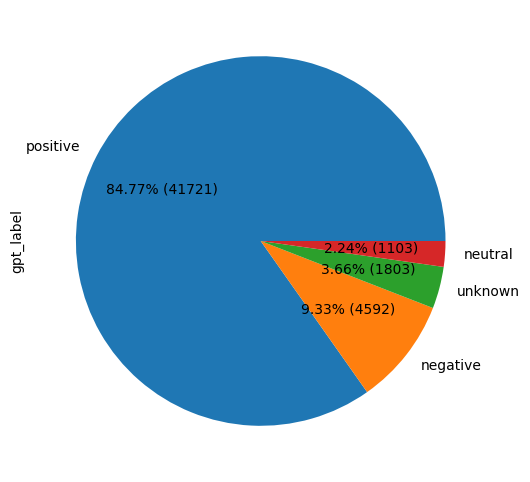

In [ ]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(6, 6))
teste['gpt_label'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))

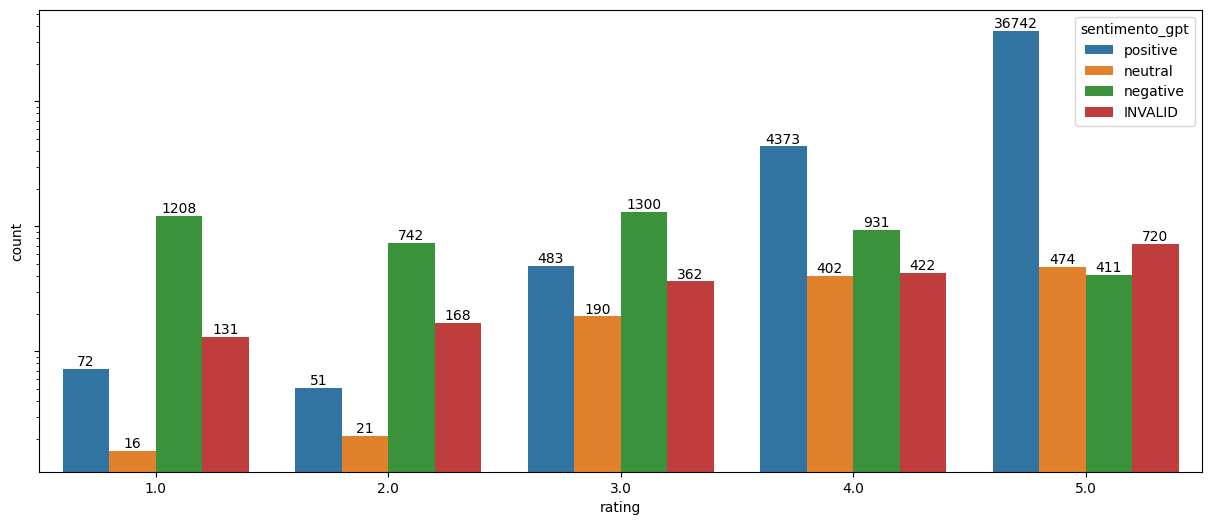

In [174]:
plt.figure(figsize=(15, 6))
sns.countplot(x="rating",hue='sentimento_gpt', data=teste)
ax = plt.gca()
ax.set_yscale("log")
ax.set_yticklabels([])
# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom')
plt.show()

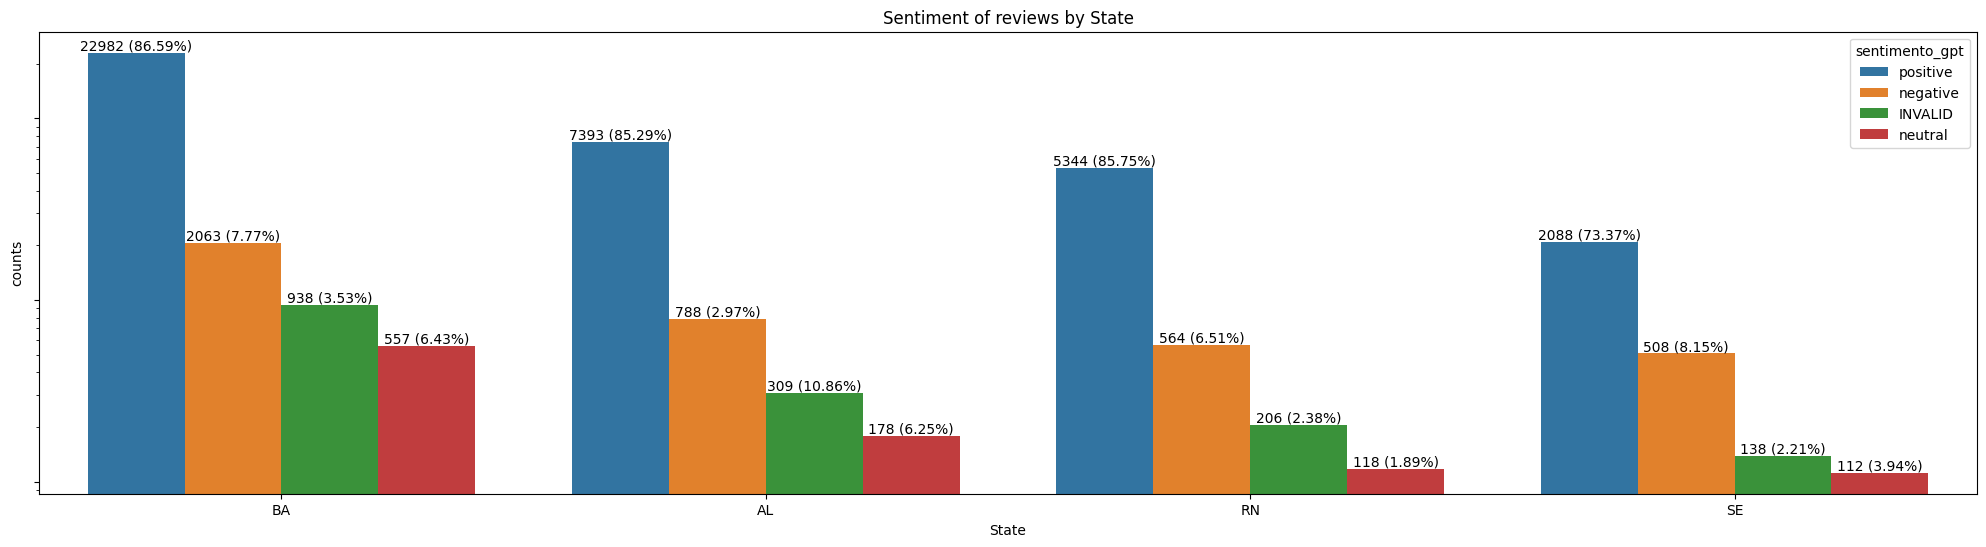

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(25, 6))
state_counts = hotels_reviews.groupby(['state', 'sentimento_gpt']).sum().reset_index().sort_values('counts', ascending=False)

g = sns.barplot(data=state_counts, x='state', hue='sentimento_gpt', y='counts', ax=ax)
ax.set_title('Sentiment of reviews by State')
ax.set_xlabel('State')
# Calculate total counts for each state
total_counts = state_counts.groupby('state')['counts'].transform('sum')

for p, total_count in zip(ax.patches, total_counts):
    # Get the count value of the bar
    count = p.get_height()
    percentage = (count / total_count) * 100
    # Add the count value as text annotation
    ax.annotate(f'{int(count)} ({percentage:.2f}%)', (p.get_x() + p.get_width() / 2, p.get_height()),
                      ha='center', va='bottom')

ax.set_yscale("log")
ax.set_yticklabels([])

# Display the plots
plt.show()

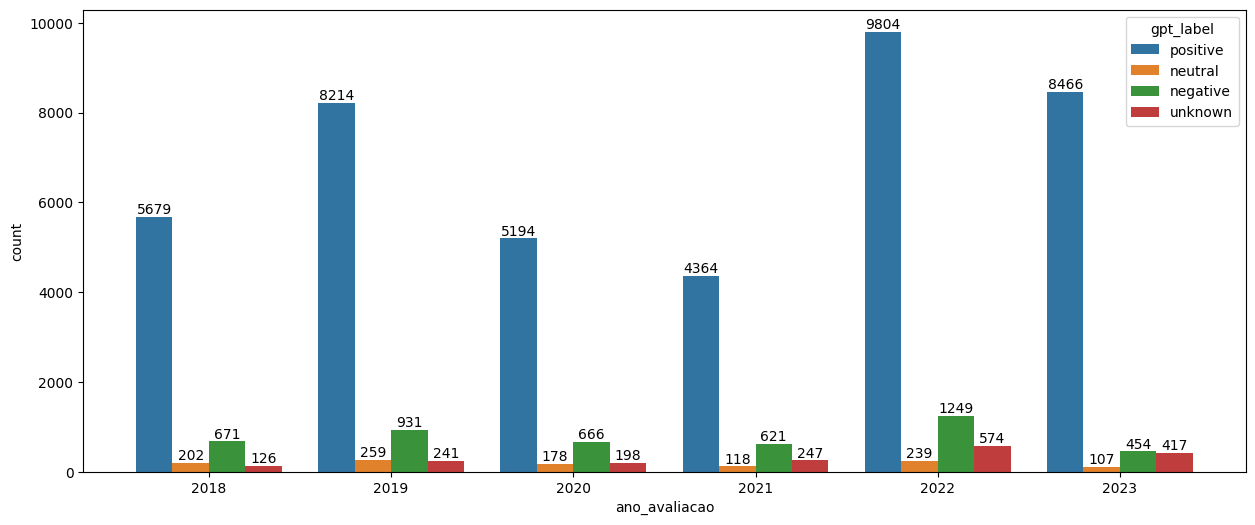

In [200]:
import seaborn as sns
import matplotlib as mpl
plt.figure(figsize=(15, 6))
sns.countplot(x='ano_avaliacao', hue='gpt_label', data=teste)

ax = plt.gca()
# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom')
ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.autoscale()
plt.show()

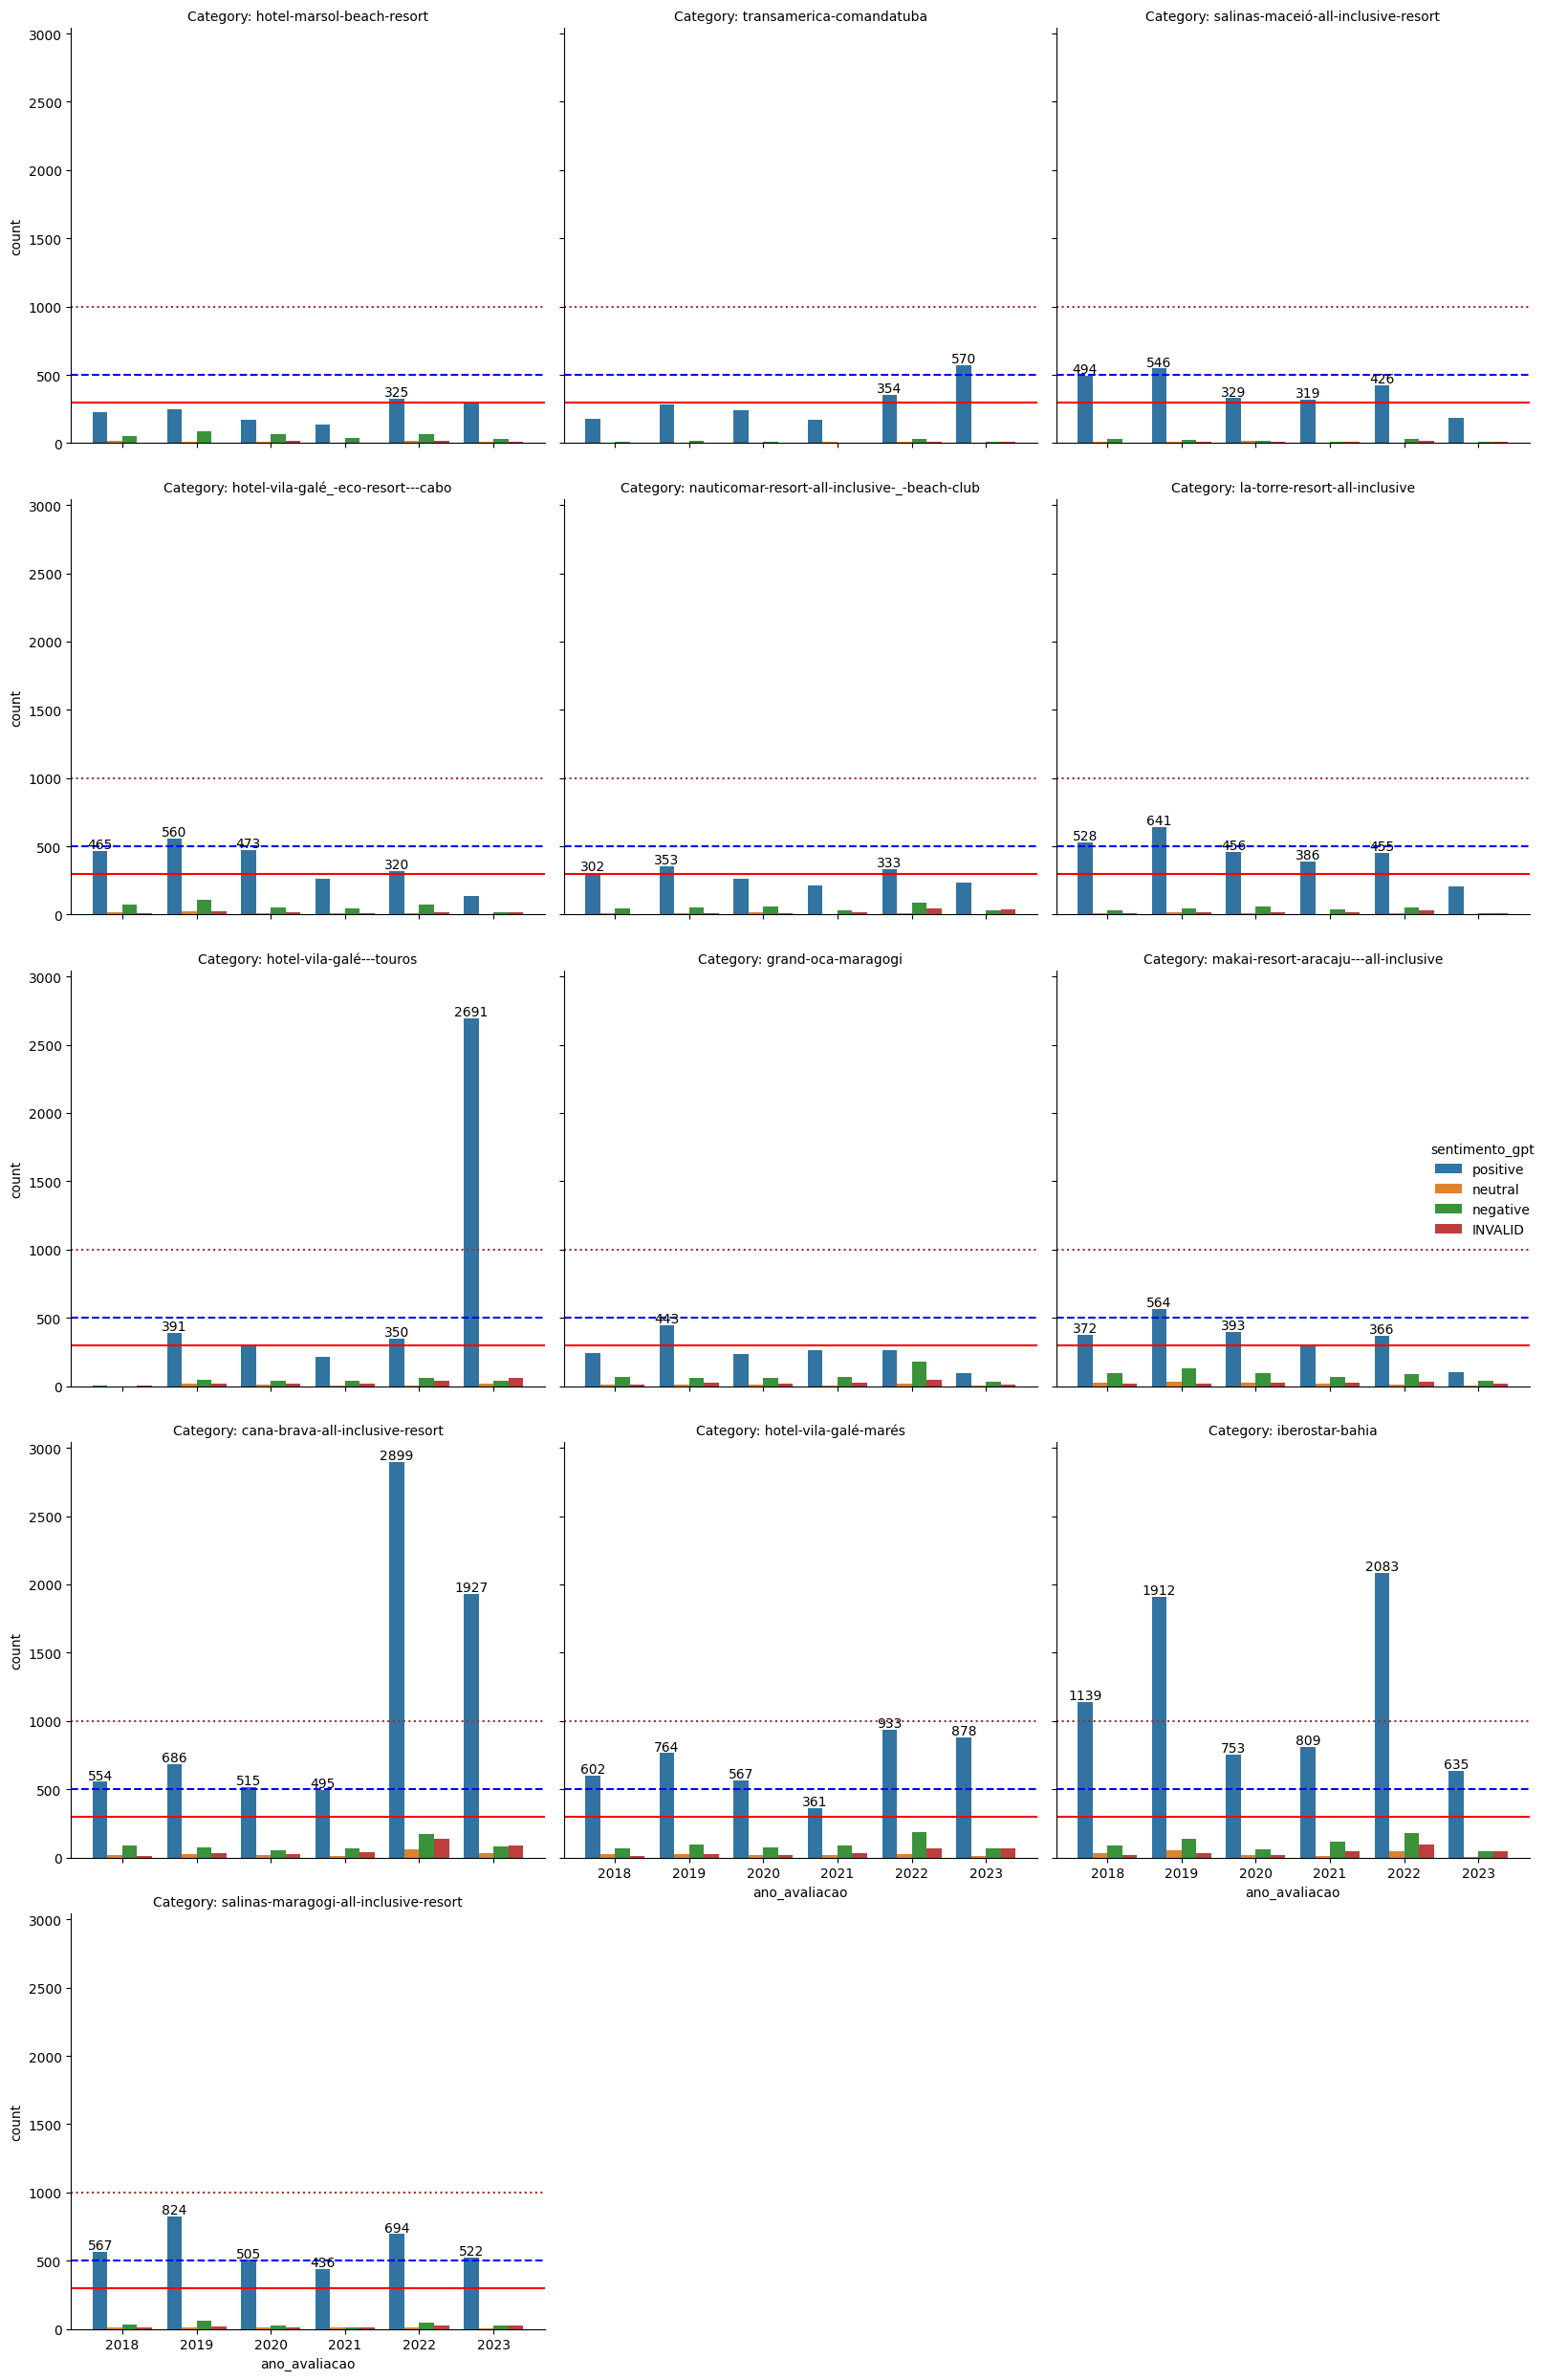

In [221]:
# Create countplot with subplots
g = sns.catplot(
    x="ano_avaliacao",
    hue='sentimento_gpt',
    col="source",
    data=teste,
    col_wrap=3,
    kind='count',
    height=5,
    aspect=1,
)

# Iterate over each subplot
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
    ax.autoscale()
    # Iterate over each bar in the subplot
    for p in ax.patches:
        # Get the count value of the bar
        count = p.get_height()
        if(count>300):
          # Add the count value as text annotation
          ax.annotate(int(count),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center',
                      va='center',
                      xytext=(0, 5), textcoords='offset points')
    ax.axhline(y=300, color='red', linestyle='-')
    ax.axhline(y=500, color='blue', linestyle='--')
    ax.axhline(y=1000, color='brown', linestyle=':')

# Set titles for each subplot
g.set_titles("Category: {col_name}")

# Adjust spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()


#### Vicuna

8h executando

In [132]:
teste['vicuna_label'].value_counts()

positive    42394
negative     2751
neutral      2328
unknown      1746
Name: vicuna_label, dtype: int64

<Axes: ylabel='vicuna_label'>

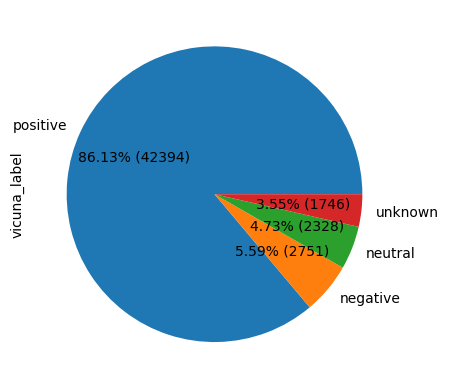

In [133]:
teste['vicuna_label'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))

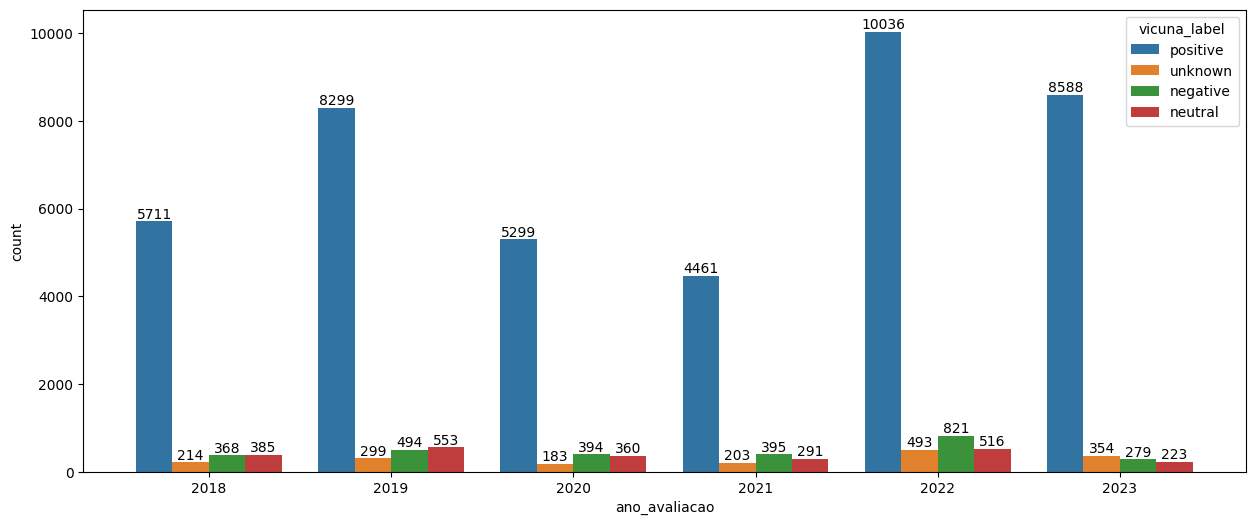

In [204]:
plt.figure(figsize=(15, 6))
sns.countplot(x='ano_avaliacao', hue='vicuna_label', data=teste)
ax = plt.gca()
# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom')
ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.autoscale()
plt.show()

#### openchat

In [ ]:
teste['openchat_label'].value_counts()

positive    40818
unknown      5568
neutral      2080
negative      753
Name: openchat_label, dtype: int64

<Axes: ylabel='openchat_label'>

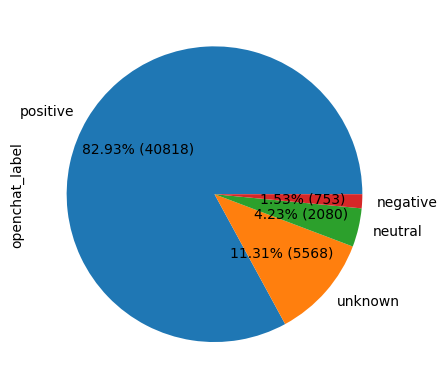

In [ ]:
teste['openchat_label'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))

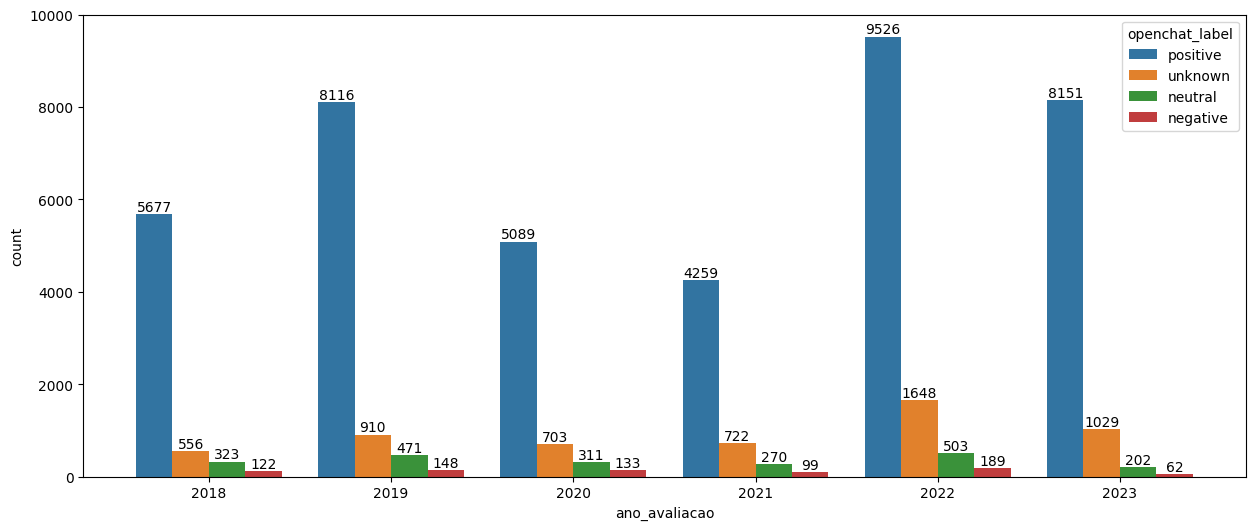

In [206]:
plt.figure(figsize=(15, 6))
sns.countplot(x='ano_avaliacao', hue='openchat_label', data=teste)
ax = plt.gca()
# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom')
ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.autoscale()
plt.show()

#### berts

<Axes: ylabel='bert_label'>

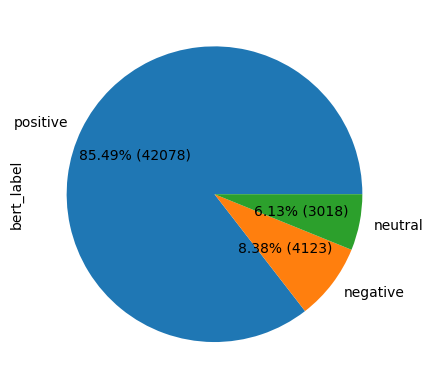

In [ ]:
teste['bert_label'].value_counts().plot.pie(y='bert_label', autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))

<Axes: ylabel='citizenlab_gpt_match'>

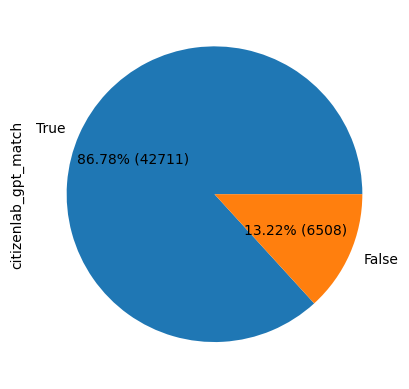

In [ ]:
teste['citizenlab_gpt_match'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))

<Axes: ylabel='philschmid_gpt_match'>

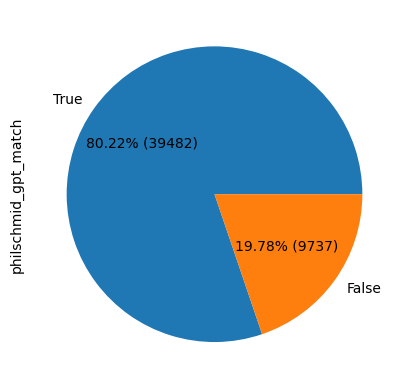

In [ ]:
teste['philschmid_gpt_match'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))

### distribuição da classificação dois a dois

In [ ]:
import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
    from matplotlib import pyplot as plt
    import seaborn as sns
    import pandas as pd

    plt.subplots(figsize=(8 * figscale, 8 * figscale))

    # Create a 2D histogram DataFrame
    df_2dhist = pd.DataFrame({
        x_label: grp[y_colname].value_counts()
        for x_label, grp in df.groupby(x_colname)
    })

    # Create the heatmap
    sns.heatmap(df_2dhist, cmap=mpl_palette_name, annot=True, fmt='.0f')  # Set annot=True for annotations, fmt='d' for integer values

    plt.xlabel(x_colname)
    plt.ylabel(y_colname)

    return autoviz.MplChart.from_current_mpl_state()

#### GPT vs bert por ano

In [ ]:
import numpy as np
from google.colab import autoviz

def heatmap2(df, ano, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
    return heatmap(df[df['ano_avaliacao'] == ano], x_colname, y_colname, figscale, mpl_palette_name)

##### 2018

In [ ]:
heatmap2(teste, 2018, 'gpt_label', 'bert_label')

##### 2019

In [ ]:
heatmap2(teste, 2019, 'gpt_label', 'bert_label')

##### 2020

In [ ]:
heatmap2(teste, 2020, 'gpt_label', 'bert_label')

##### 2021

In [ ]:
heatmap2(teste, 2021, 'gpt_label', 'bert_label')

##### 2022

In [ ]:
heatmap2(teste, 2022, 'gpt_label', 'bert_label')

##### 2023

In [ ]:
heatmap2(teste, 2023, 'gpt_label', 'bert_label')

In [ ]:
heatmap(teste, 'gpt_label', 'bert_label')

In [ ]:
dfff = pd.DataFrame({
    (x_label, bert_label): grp['bert_label'].value_counts()
    for (x_label, bert_label), grp in teste.groupby(['ano_avaliacao', 'gpt_label'])
})

#### GPT e vicuna

<Axes: ylabel='vicuna_gpt_match'>

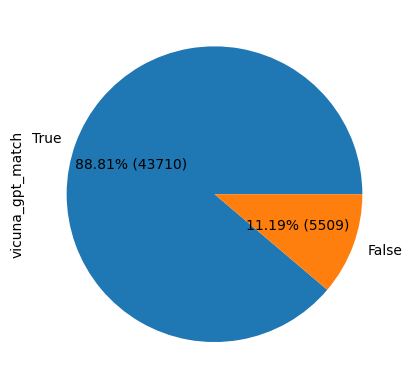

In [ ]:
teste['vicuna_gpt_match'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))

In [ ]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.width', 2000,
                       'display.float_format', '{:20,.2f}'.format,
                       'display.max_colwidth', None):
  display(pd.DataFrame({
      vicuna_label: grp['gpt_label'].value_counts()/49219*100
      for vicuna_label, grp in teste.groupby('vicuna_label')
  }))

,negative,neutral,positive,unknown
negative,4.96,2.13,1.01,1.24
neutral,0.02,1.07,0.98,0.17
positive,0.09,1.05,82.13,1.50
unknown,0.52,0.49,2.01,0.65


In [ ]:
teste.shape

(49219, 44)

In [ ]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.width', 2000,
                       'display.float_format', '{:20,.2f}'.format,
                       'display.max_colwidth', None):
  display(pd.DataFrame({
      (x_label, vicuna_label): grp['gpt_label'].value_counts()
      for (x_label, vicuna_label), grp in teste.groupby(['ano_avaliacao', 'vicuna_label'])
  }))

2018                              2019                              2020                              2021                              2022                                          2023                         
         negative neutral positive unknown negative neutral positive unknown negative neutral positive unknown negative neutral positive unknown negative neutral positive unknown             negative neutral positive unknown
negative      335     160       86      90      441     257      115     118      366     171       54      75      350     133       59      79      717     244      127     161               231.00      82       56      85
neutral         3     110       69      20        4     136      104      15        2      86       85       5        1      65       47       5        1      94      121      23                  NaN      36       57      14
positive        8      95     5490      86       15     124     7948     127        6      77     5039      72        2      58     4226      78        9      97     9499     199                 3.00      64     8223     176
unknown        22      20       66      18       34      36      132      39       20      26      121      31       42      35      129      41       94      81      289     110                45.00      41      252      79

In [ ]:
heatmap(teste, *['gpt_label', 'vicuna_label'], **{})

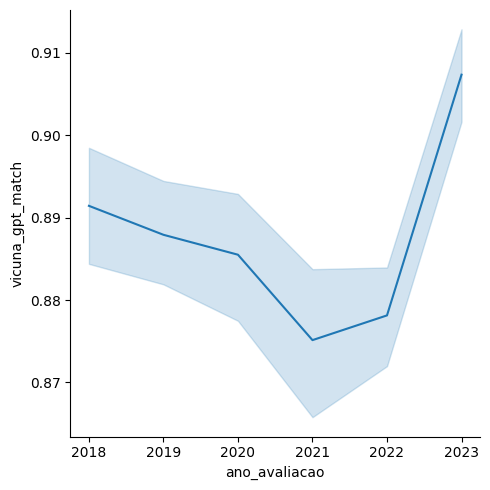

In [ ]:
sns.relplot(x='ano_avaliacao', y='vicuna_gpt_match', kind="line", data=teste)

#### GPT e openchat

<Axes: ylabel='openchat_gpt_match'>

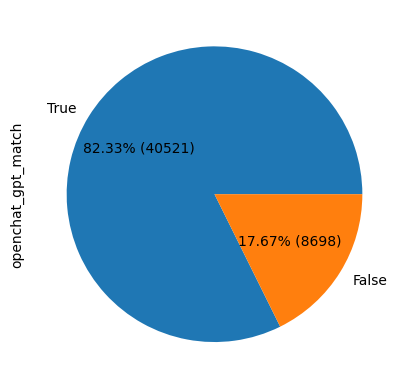

In [ ]:
teste['openchat_gpt_match'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))

In [ ]:
heatmap(teste, *['gpt_label', 'openchat_label'], **{})

In [ ]:
heatmap(teste, *['bert_label', 'openchat_label'], **{})

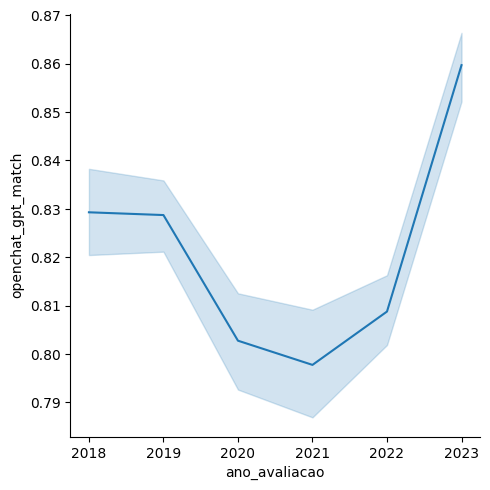

In [ ]:
sns.relplot(x='ano_avaliacao', y='openchat_gpt_match', kind="line", data=teste)

#### vicuna e openchat

<Axes: ylabel='vicuna_openchat_match'>

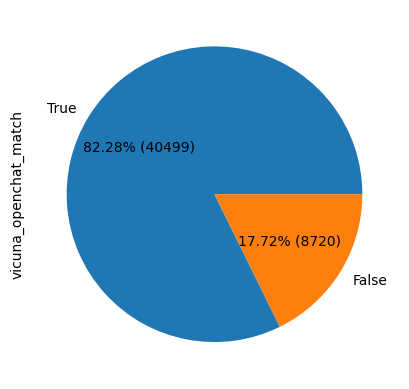

In [ ]:
teste['vicuna_openchat_match'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))

In [ ]:
heatmap(teste, *['vicuna_label', 'openchat_label'], **{})

#### BERTS

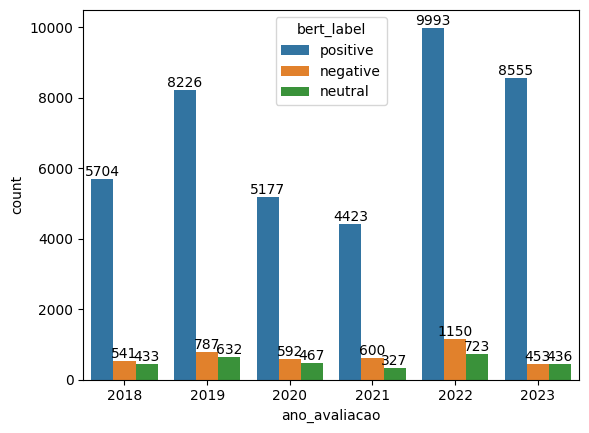

In [124]:
sns.countplot(x='ano_avaliacao', hue='bert_label', data=teste)
ax = plt.gca()
# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom')
plt.show()

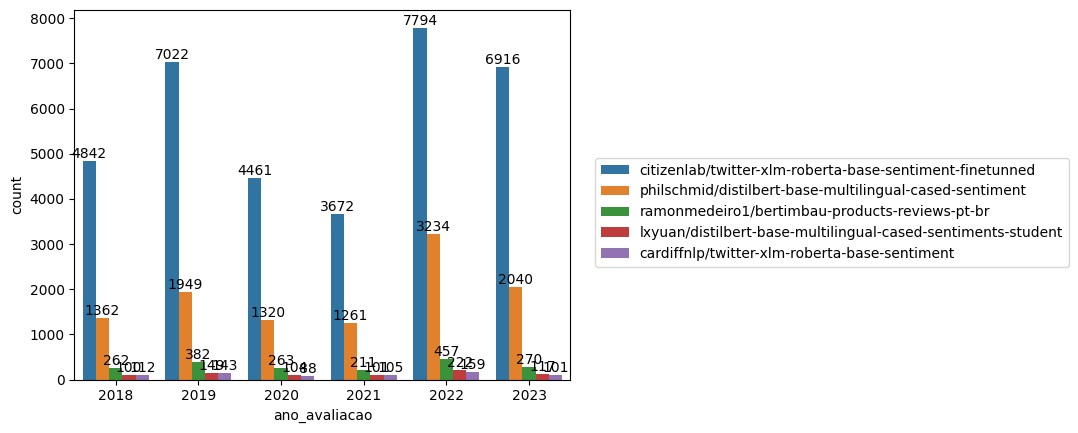

In [125]:
sns.countplot(x='ano_avaliacao',
              hue='sentiment_bert_max',
              data=teste)
plt.legend(bbox_to_anchor=(1.05, .6), loc='upper left', borderaxespad=0)
ax = plt.gca()
# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom')
plt.show()

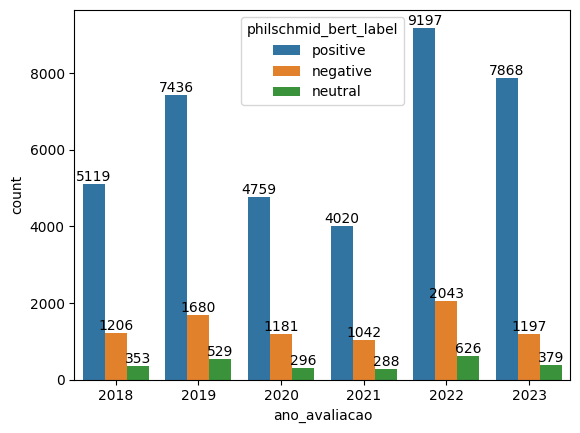

In [126]:
sns.countplot(x='ano_avaliacao', hue='philschmid_bert_label', data=teste)
ax = plt.gca()
# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom')
plt.show()

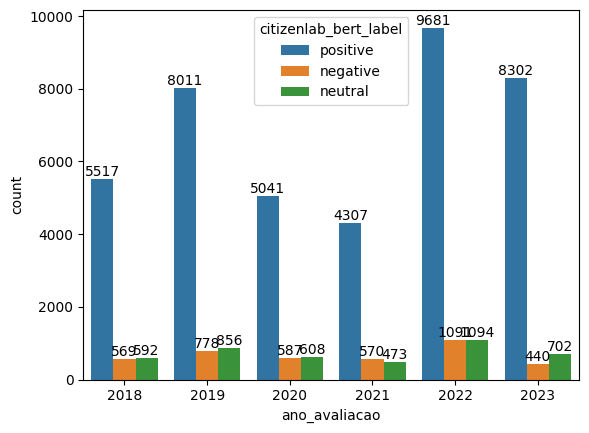

In [127]:
sns.countplot(x='ano_avaliacao', hue='citizenlab_bert_label', data=teste)
ax = plt.gca()
# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom')
plt.show()

<Axes: ylabel='bert_gpt_match'>

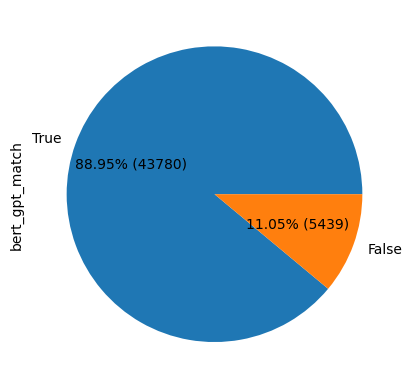

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

teste['bert_gpt_match'].value_counts().plot.pie(autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, len(teste) * p / 100))

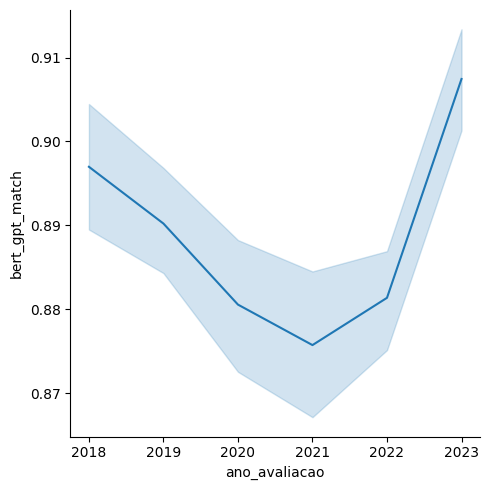

In [129]:
sns.relplot(x='ano_avaliacao', y='bert_gpt_match', kind="line", data=teste)

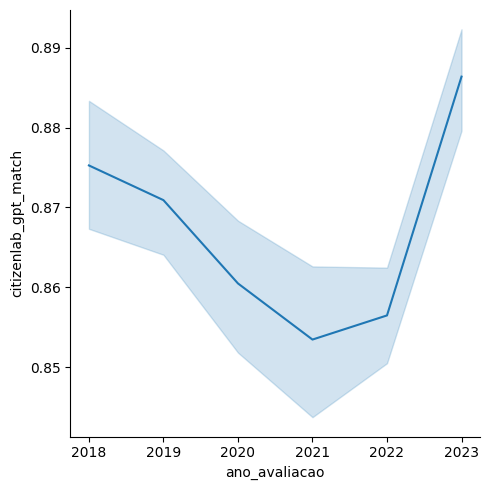

In [ ]:
sns.relplot(x='ano_avaliacao', y='citizenlab_gpt_match', kind="line", data=teste)

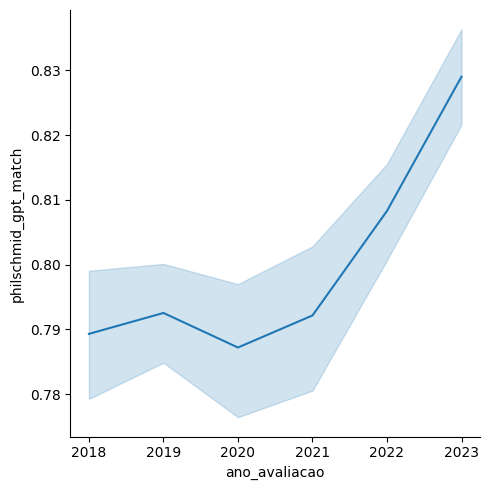

In [ ]:
sns.relplot(x='ano_avaliacao', y='philschmid_gpt_match', kind="line", data=teste)

In [ ]:
heatmap(teste, *['gpt_label', 'bert_label'], **{})

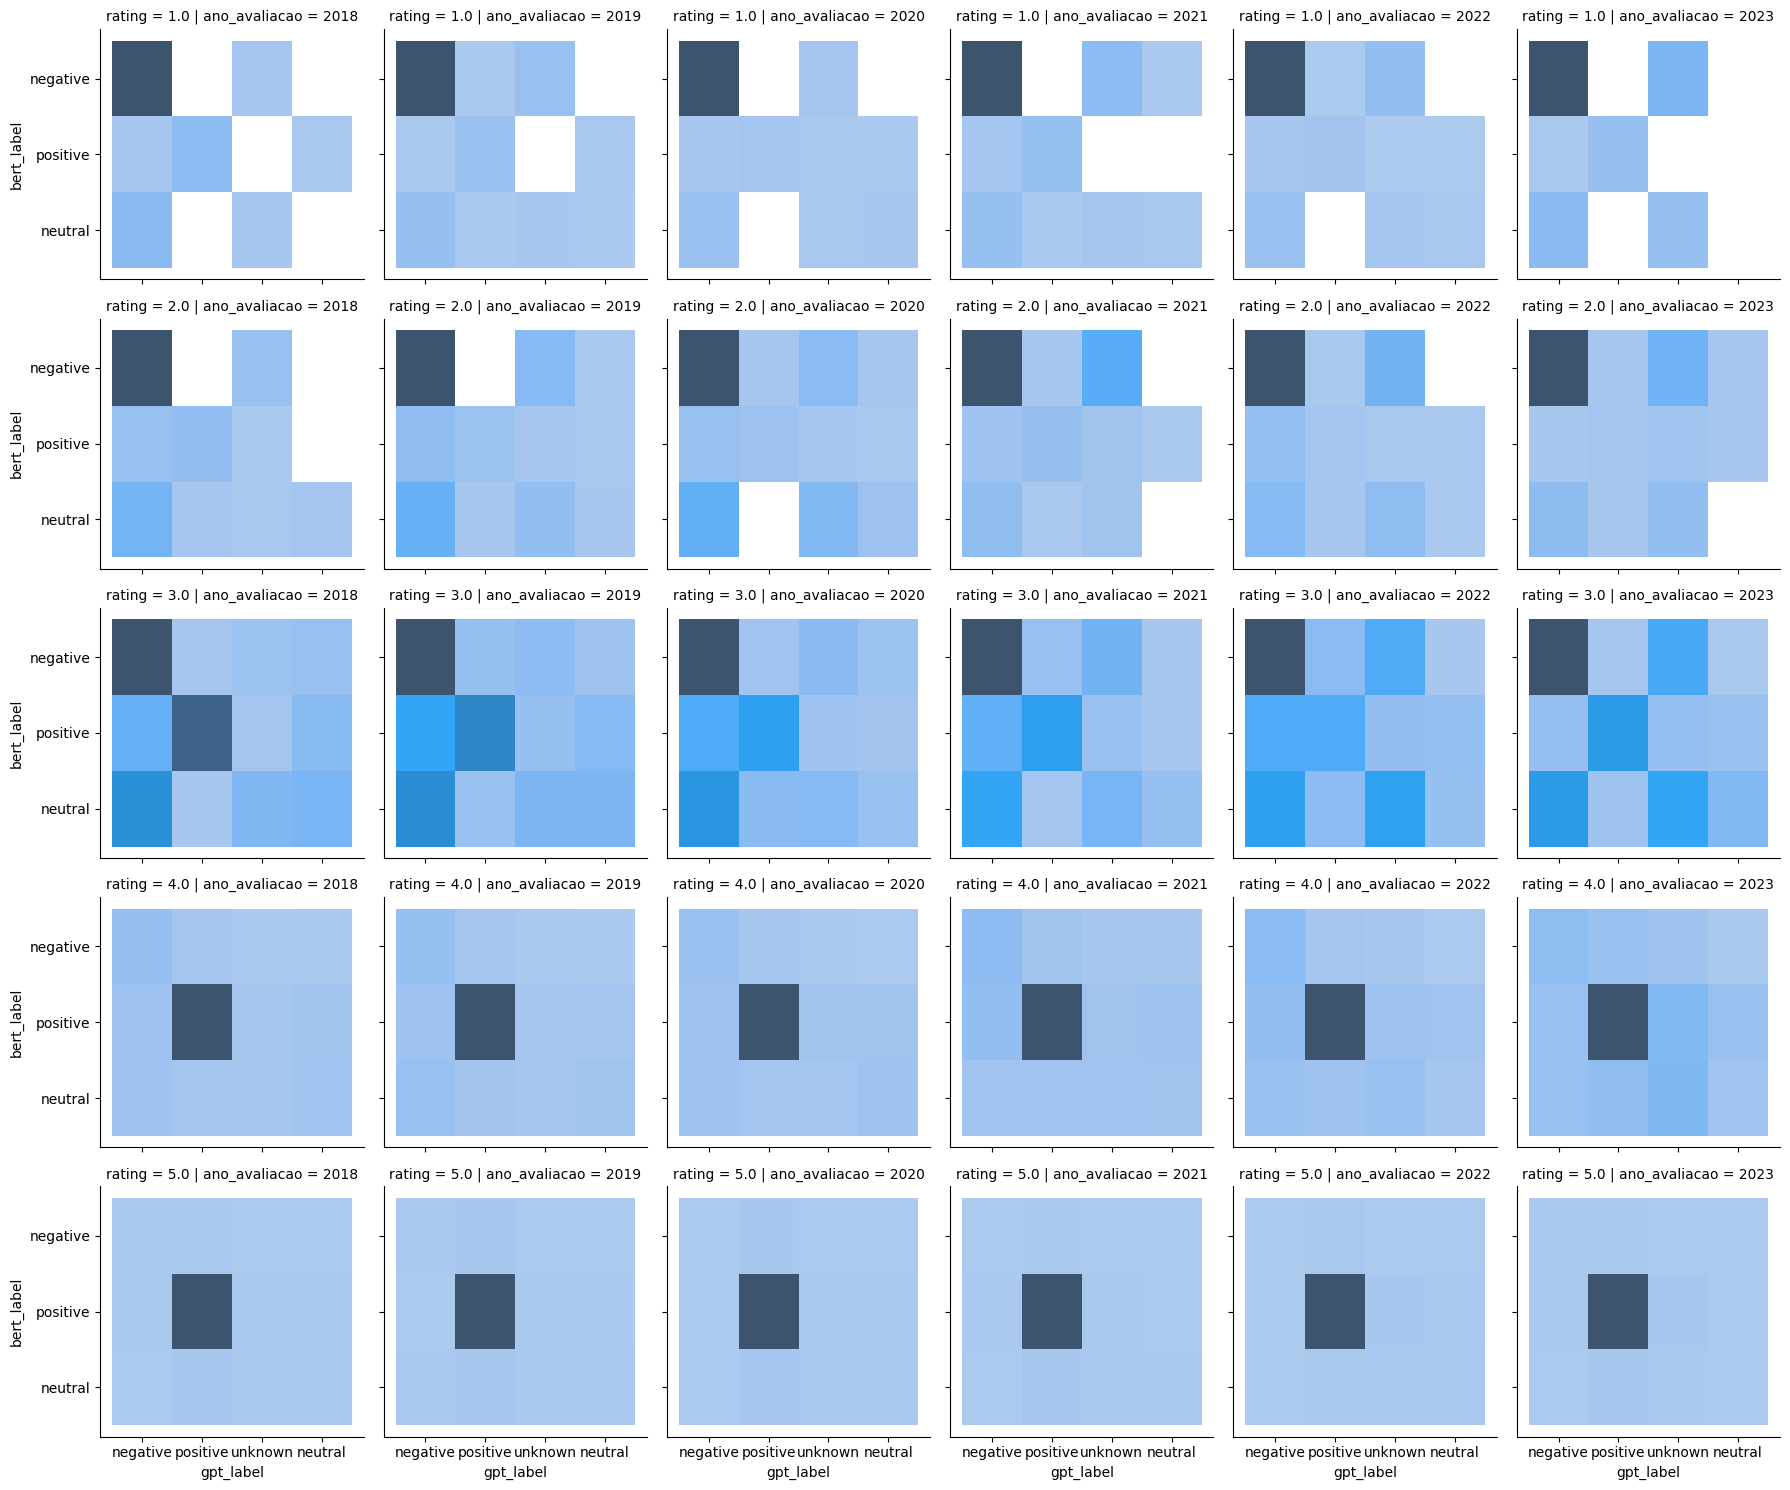

In [130]:
# sns.FacetGrid?

g = sns.FacetGrid(teste, col="ano_avaliacao", row="rating")
g.map_dataframe(sns.histplot, x="gpt_label", y='bert_label')

#### consistencia da classificacao com o GPT

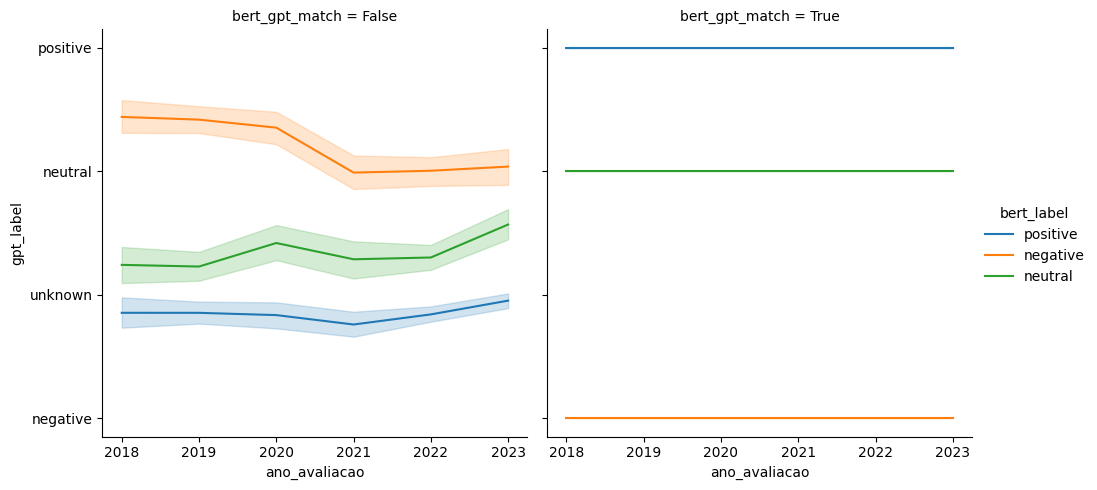

In [ ]:
sns.relplot(x='ano_avaliacao', y='gpt_label', hue='bert_label', col="bert_gpt_match", data=teste, kind='line')

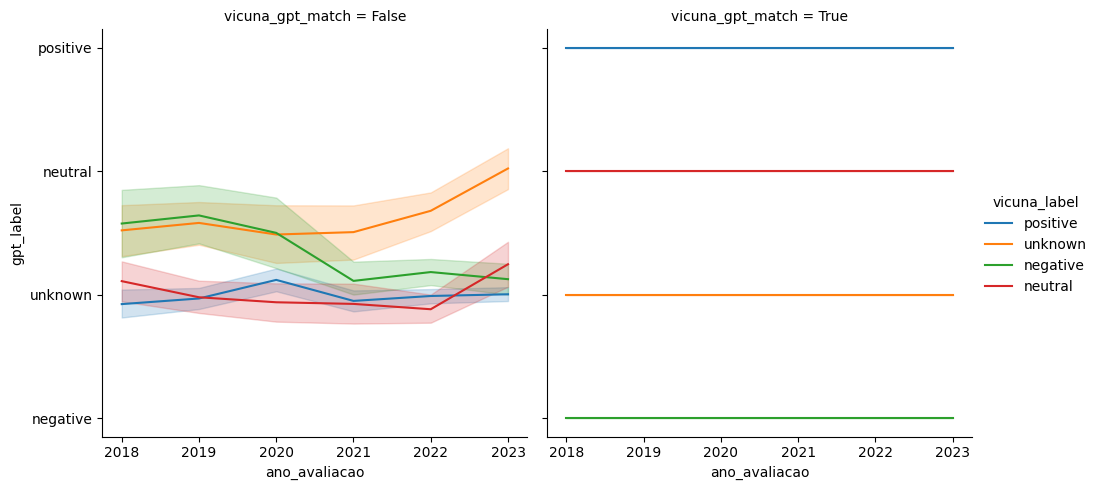

In [ ]:
sns.relplot(x='ano_avaliacao', y='gpt_label', hue='vicuna_label', col="vicuna_gpt_match", data=teste, kind='line')

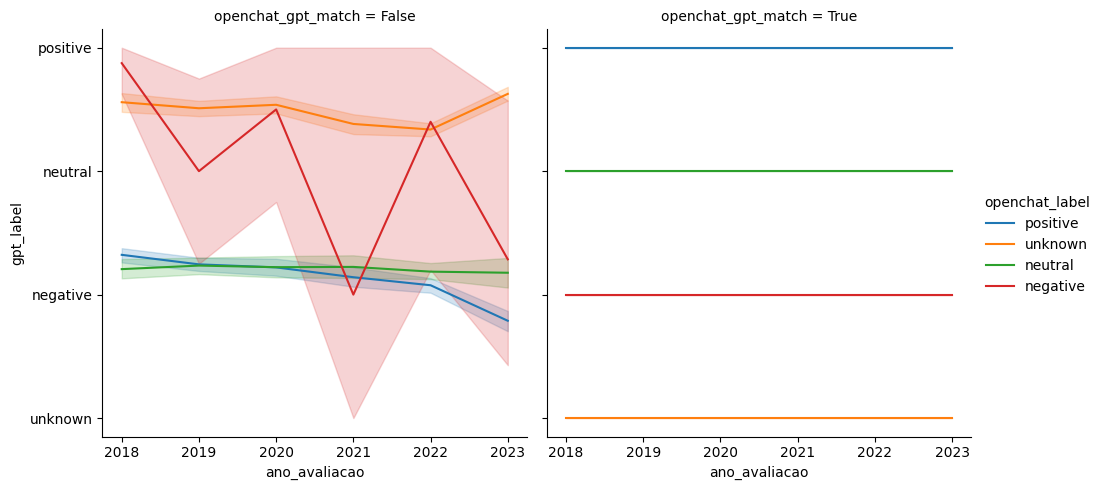

In [ ]:
para você foi atribuida a tarefa de classificar o sentimento de sentenças em português que são avaliações de hoteis, classifique-as em 2, 1 e 0 sem necessidade de justificativasns.relplot(x='ano_avaliacao', y='gpt_label', hue='openchat_label', col="openchat_gpt_match", data=teste, kind='line')

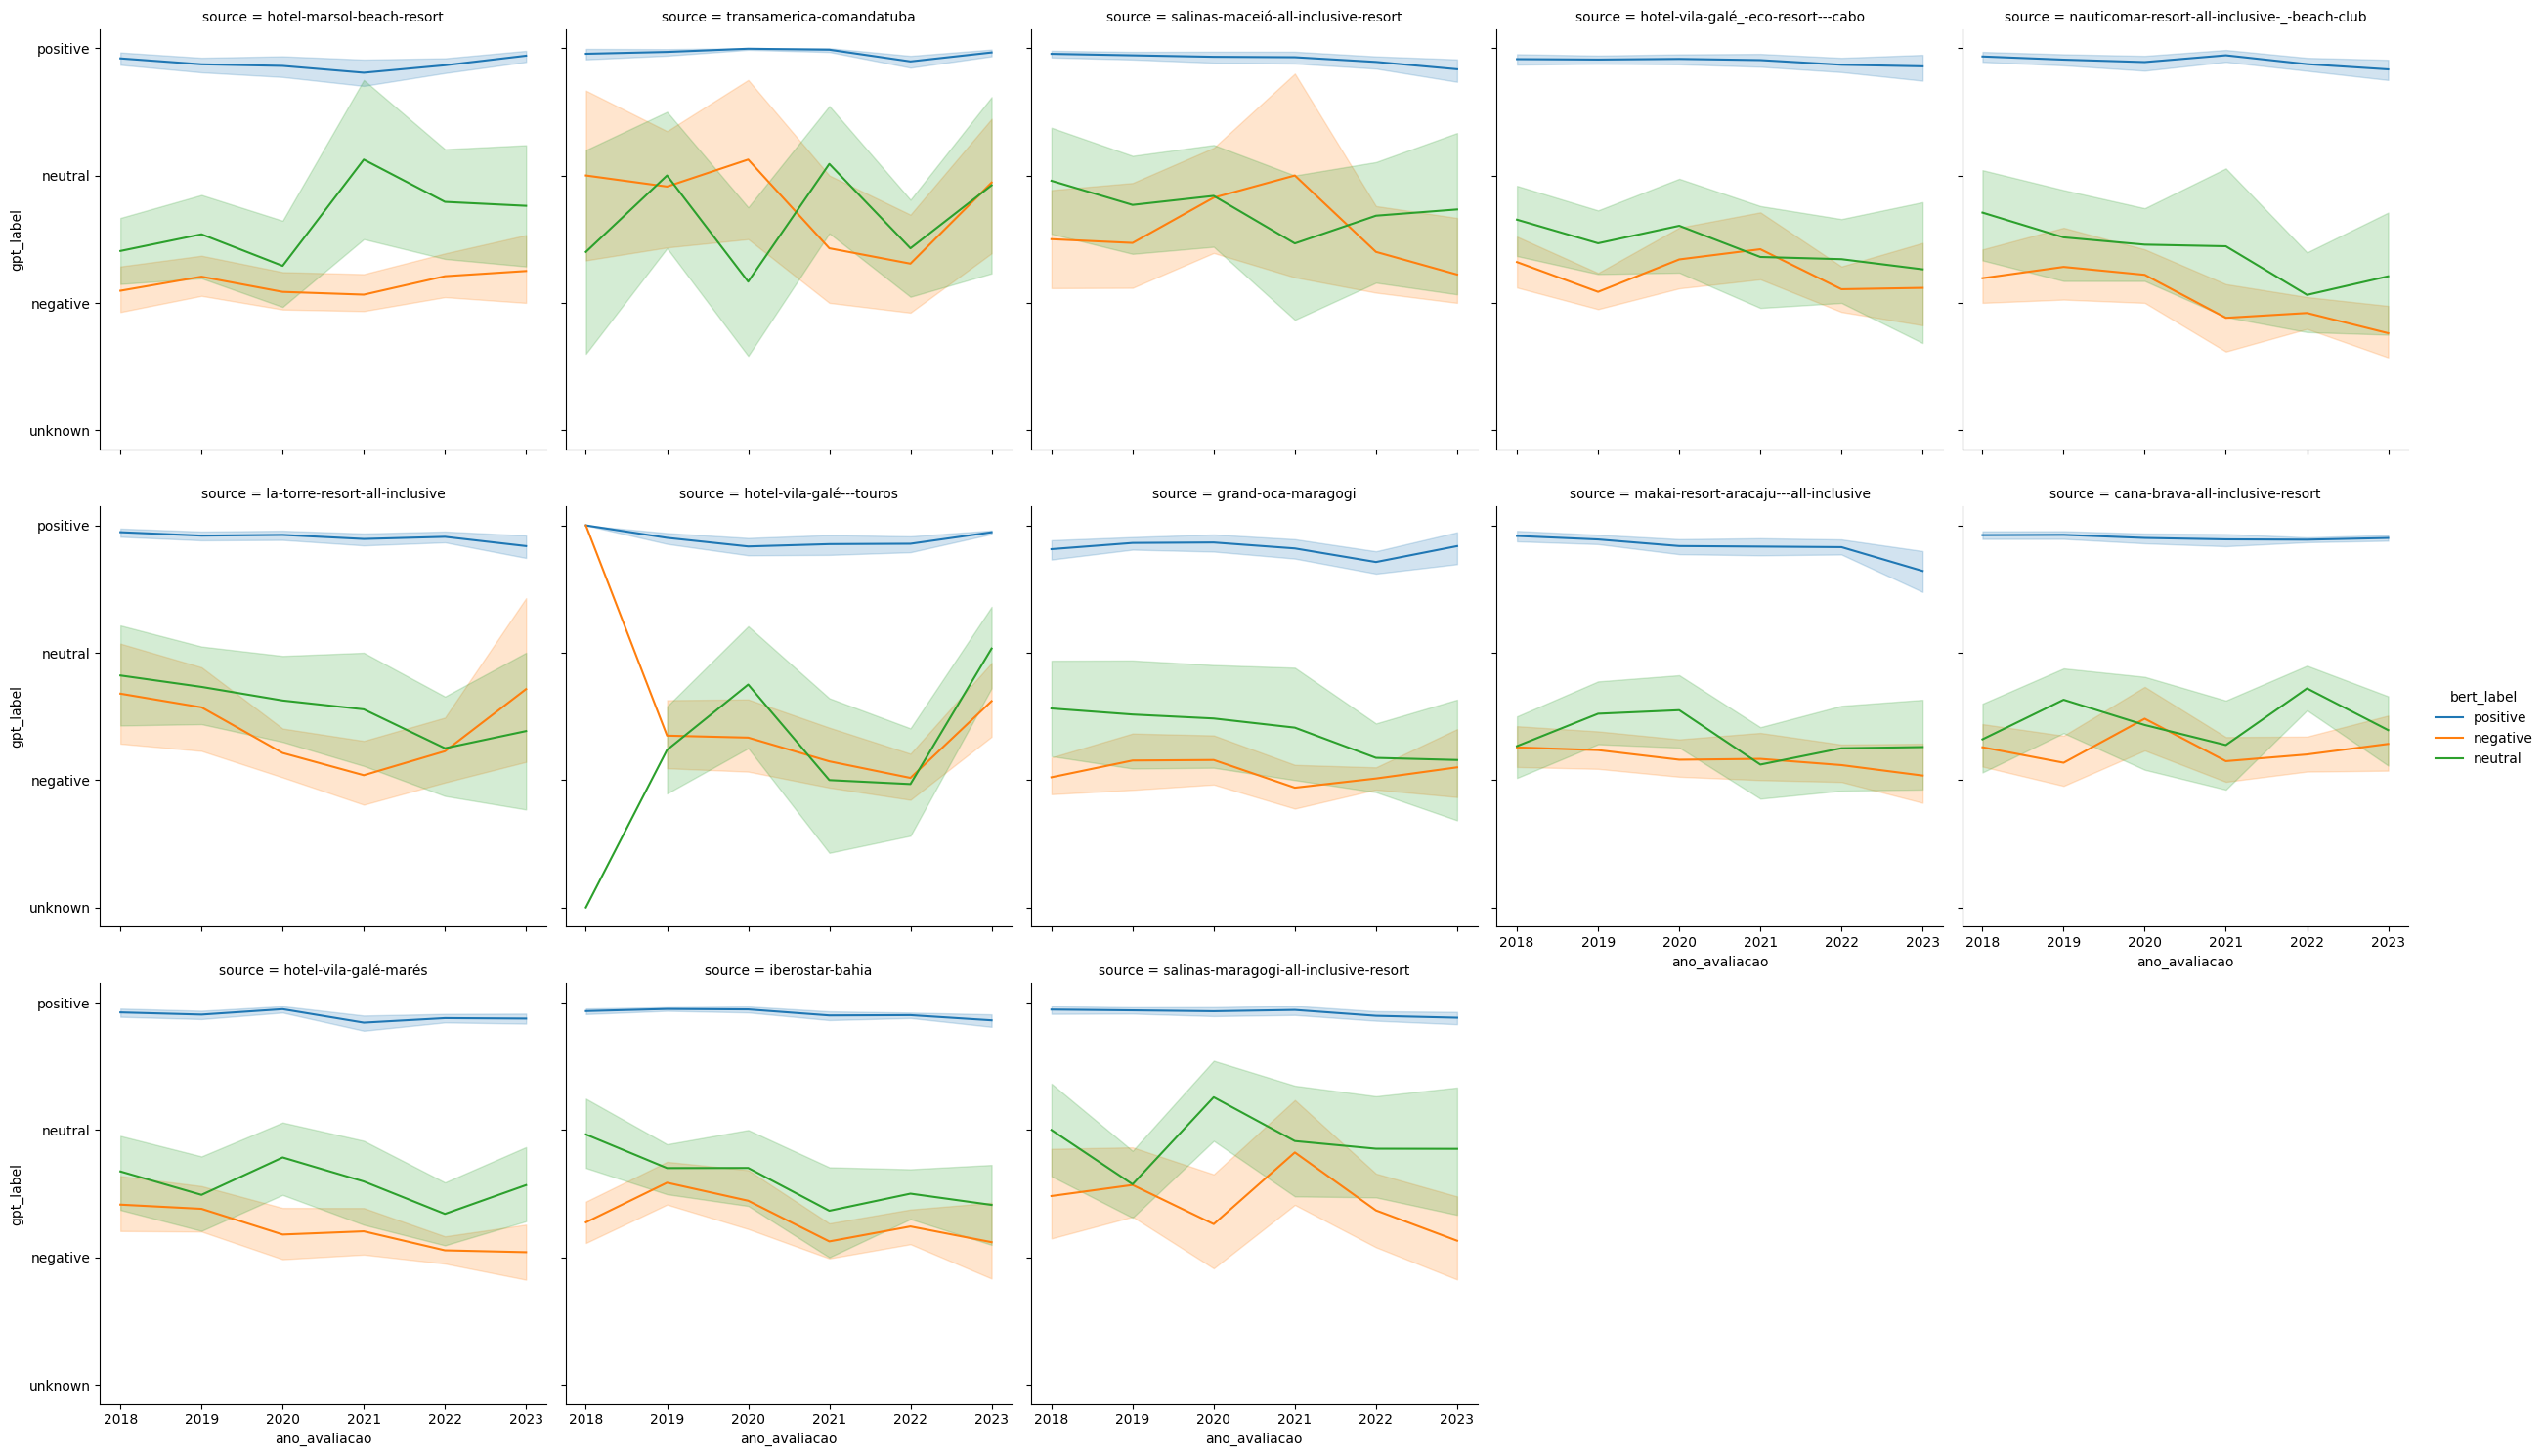

In [ ]:
sns.relplot(x='ano_avaliacao', col_wrap=5, col="source", y='gpt_label', hue='bert_label', data=teste, kind='line')

### inconsistencia do openchat

In [ ]:
teste[teste.text == 'Sem palavras'][['relative_date', 'likes', 'mes_ano_avaliacao', 'sentiment_label', 'sentiment_bert', 'rating', 'text', 'source', 'gpt_label','vicuna_label','openchat_label']]

,relative_date,likes,mes_ano_avaliacao,sentiment_label,sentiment_bert,rating,text,source,gpt_label,vicuna_label,openchat_label
39,3 semanas atrás,0,2023-06,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,hotel-marsol-beach-resort,neutral,positive,positive
5932,5 anos atrás,0,2018-07,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,salinas-maceió-all-inclusive-resort,neutral,positive,positive
14076,5 anos atrás,0,2018-07,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,la-torre-resort-all-inclusive,neutral,positive,positive
14548,2 semanas atrás,0,2023-06,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,hotel-vila-galé---touros,neutral,positive,positive
35522,4 anos atrás,0,2019-07,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,hotel-vila-galé-marés,neutral,positive,neutral
48076,4 anos atrás,1,2019-07,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,salinas-maragogi-all-inclusive-resort,neutral,positive,neutral
48708,5 anos atrás,0,2018-07,"[positive, neutral, negative]","[{'label': 'positive', 'score': 0.351064860820...",5.0,Sem palavras,salinas-maragogi-all-inclusive-resort,neutral,positive,positive


### Tokens

In [ ]:
teste_copy = teste.copy()

In [ ]:
teste_copy[['tokens_vicuna', 'tokens_gpt', 'tokens_openchat']]

,tokens_vicuna,tokens_gpt,tokens_openchat
0,147,102,124
1,141,97,116
2,139,95,117
3,140,96,117
4,140,97,117
...,...,...,...
49214,186,136,167
49215,140,96,117
49216,140,96,119
49217,150,106,127


<Axes: >

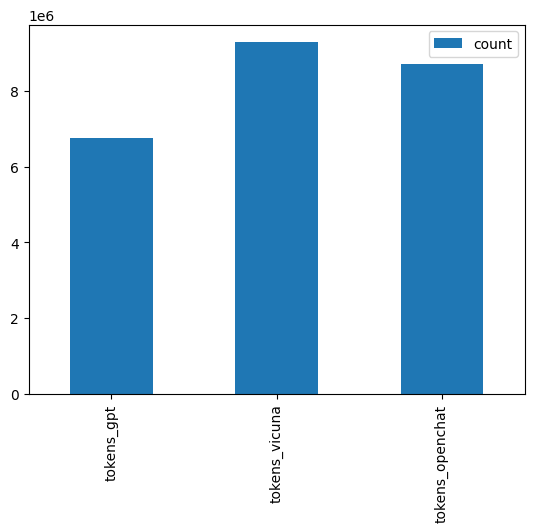

In [ ]:
pd.DataFrame(teste_copy[['tokens_gpt', 'tokens_vicuna', 'tokens_openchat']].sum(), columns=['count']).plot.bar()

# curiosidade

In [194]:
#@title avaliados como positivo e com 1 de nota

pd.DataFrame(teste[(teste["rating"] == 1) & (teste["sentimento_gpt"] == 'positive')]['text'].value_counts())

,text
Bom,4
Muito bom,2
Maravilhoso,2
Excelente atendimento. Higiene muito boa . Café da manhã com pouco variedade esse é o ponto negativo . Quartos : 4/5,1
"Incrível, estadia maravilhosa....equipe de recreação sensacional.... tio Frajola, Tio Tomate e Tia Pepa são demais..... parabéns! Várias atrações boas para a família toda",1
...,...
Ótimo atendimento,1
Muito lindo,1
"melhor parte é a praia, o local é bem bonito, comida MUITO fraquinha, vale pagar um pouco a mais e ir no salinas",1
Muito legal Maragogi está de parabéns que venha muitas pessoas visitar essa cidade maravilhosa de Maragogi,1
